# Import Library

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shutil

import warnings
warnings.filterwarnings('ignore')

# Check real data

## Demographics

### Processing

In [2]:
df_demo = pd.read_csv('../../data/c1_c2_demographics.csv')
df_demo

,PTID,PTGENDER,PTDOBYY,PTEDUCAT
0,002_S_0295,1.0,1921.0,18.0
1,002_S_0559,1.0,1927.0,16.0
2,002_S_0816,1.0,1935.0,20.0
3,002_S_0954,2.0,1937.0,14.0
4,002_S_1018,2.0,1936.0,13.0
...,...,...,...,...
619,941_S_2060,2.0,1936.0,13.0
620,941_S_4100,2.0,1932.0,12.0
621,941_S_4292,1.0,1940.0,15.0
622,941_S_4764,2.0,1929.0,20.0


In [3]:
# Lọc các dữ liệu bị trùng
df_unique = df_demo.drop_duplicates(subset=['PTID'], keep='first')
df_unique

,PTID,PTGENDER,PTDOBYY,PTEDUCAT
0,002_S_0295,1.0,1921.0,18.0
1,002_S_0559,1.0,1927.0,16.0
2,002_S_0816,1.0,1935.0,20.0
3,002_S_0954,2.0,1937.0,14.0
4,002_S_1018,2.0,1936.0,13.0
...,...,...,...,...
618,941_S_2060,2.0,1936.0,13.0
620,941_S_4100,2.0,1932.0,12.0
621,941_S_4292,1.0,1940.0,15.0
622,941_S_4764,2.0,1929.0,20.0


In [4]:
df_unique.to_csv('../../data/new_c1_c2_demographics.csv', index=False)

### Analysis

In [5]:
df_demographics = pd.read_csv('../../data/new_c1_c2_demographics.csv')
df_demographics

,PTID,PTGENDER,PTDOBYY,PTEDUCAT
0,002_S_0295,1.0,1921.0,18.0
1,002_S_0559,1.0,1927.0,16.0
2,002_S_0816,1.0,1935.0,20.0
3,002_S_0954,2.0,1937.0,14.0
4,002_S_1018,2.0,1936.0,13.0
...,...,...,...,...
428,941_S_2060,2.0,1936.0,13.0
429,941_S_4100,2.0,1932.0,12.0
430,941_S_4292,1.0,1940.0,15.0
431,941_S_4764,2.0,1929.0,20.0


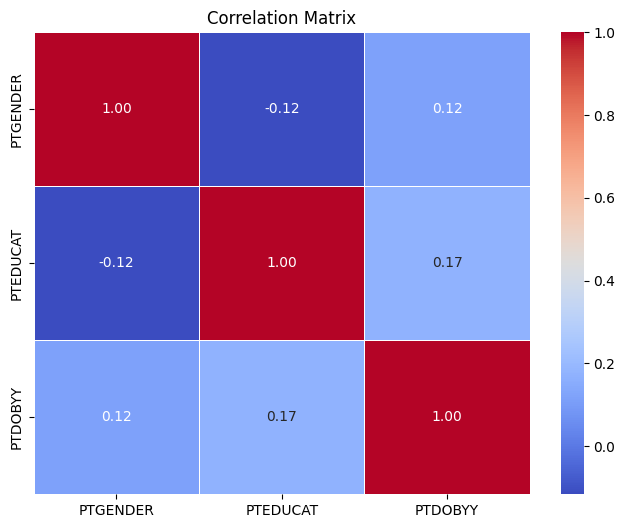

In [6]:
cols = ['PTGENDER', 'PTEDUCAT', 'PTDOBYY']
corr_matrix = df_demographics[cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

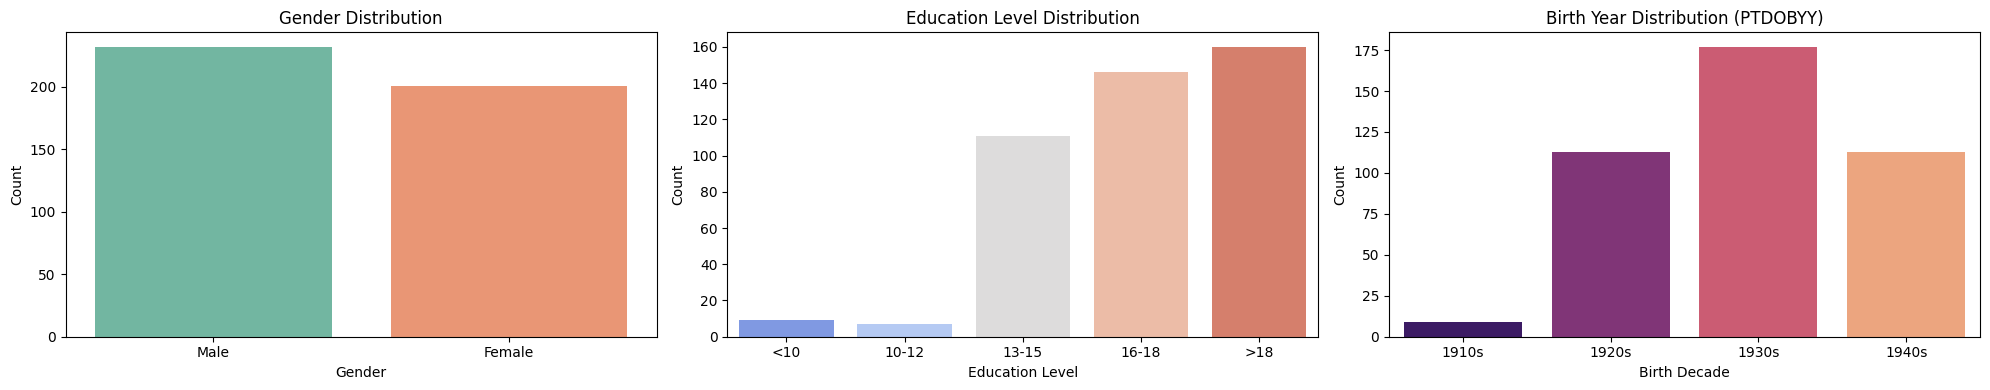

In [7]:
plt.figure(figsize=(20,4))
# 1. PTGENDER
df_demographics['PTGENDER'] = df_demographics['PTGENDER'].map({1.0: 'Male', 2.0: 'Female'})

plt.subplot(1,3,1)
sns.countplot(x='PTGENDER', data=df_demographics, palette='Set2')
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")

# 2. PTEDUCAT
bins_edu = [0, 10, 12, 15, 18, 21]
labels_edu = ['<10', '10-12', '13-15', '16-18', '>18']
df_demographics['EDU_GROUP'] = pd.cut(df_demographics['PTEDUCAT'], bins=bins_edu, labels=labels_edu, right=False)

plt.subplot(1,3,2)
sns.countplot(x='EDU_GROUP', data=df_demographics, palette='coolwarm')
plt.title("Education Level Distribution")
plt.xlabel("Education Level")
plt.ylabel("Count")

# 3. PTDBOBYY
bins_birth = [1910, 1920, 1930, 1940, 1950]
labels_birth = ['1910s', '1920s', '1930s', '1940s']
df_demographics['BIRTH_DECADE'] = pd.cut(df_demographics['PTDOBYY'], bins=bins_birth, labels=labels_birth, right=False)

plt.subplot(1,3,3)
sns.countplot(x='BIRTH_DECADE', data=df_demographics, palette='magma')
plt.title("Birth Year Distribution (PTDOBYY)")
plt.xlabel("Birth Decade")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

## Cognitive Score

### Processing

In [8]:
df = pd.read_csv('../../data/c1_c2_cognitive_score.csv')
df

,PTID,VISCODE,VISCODE2,EXAMDATE,DIAGNOSIS,image_id,mri_date,ADAS11,ADAS13,MMSCORE,CDGLOBAL
0,002_S_0295,v06,m60,2011-06-02,1.0,238627,2011-06-02,6.00,9.00,28.0,0.0
1,002_S_0295,v11,m72,2012-05-10,1.0,303066,2012-05-10,7.00,9.00,22.0,0.0
2,002_S_0559,m06,m06,2006-12-27,1.0,32918,2006-12-12,6.00,11.00,29.0,0.0
3,002_S_0559,m12,m12,2007-07-20,1.0,78364,2007-10-18,4.67,7.67,29.0,0.0
4,002_S_0559,m24,m24,2008-08-25,1.0,116582,2008-08-15,7.33,12.33,30.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1829,941_S_4292,v41,m48,2016-07-19,1.0,763574,2016-07-22,5.00,7.00,29.0,0.5
1830,941_S_4764,v11,m12,2013-06-27,2.0,376064,2013-06-10,4.00,7.00,30.0,0.5
1831,941_S_4764,v21,m24,2014-07-03,2.0,431036,2014-06-16,5.00,7.00,30.0,0.5
1832,941_S_5124,v11,m12,2014-04-25,1.0,420755,2014-04-21,7.00,10.00,26.0,0.5


In [9]:
id = df['PTID'].unique()
print(f"Total unique PTID: {len(id)}")

Total unique PTID: 433


In [11]:
image_id = df['image_id'].values
# Loaij bor cacs id gioongs nhau
image_id = np.unique(image_id)
length = len(image_id)
print(f"Finded {length} image_id in c1_c2_cognitive_score.csv")

image_id_folder = []
all_folders = os.listdir('../../data/T1_biascorr_brain_data')
print(f"Finded {len(all_folders)} image_id in T1_biascorr_brain_data folder")
for folder in all_folders:
    folder_id = folder[1:]
    folder_id = int(folder_id)
    # Kiểm tra xem id có trong danh sách image_id không
    if folder_id in image_id:
        image_id_folder.append(folder_id)

Finded 1834 image_id in c1_c2_cognitive_score.csv
Finded 1285 image_id in T1_biascorr_brain_data folder


In [16]:
def find_image_id_in_data():
    df = pd.read_csv('../../data/c1_c2_cognitive_score.csv')
    image_id = df['image_id'].values
    # Loaij bor cacs id gioongs nhau
    image_id = np.unique(image_id)
    length = len(image_id)
    print(f"Finded {length} image_id in c1_c2_cognitive_score.csv")

    image_id_folder = []
    all_folders = os.listdir(f'../../data/T1_biascorr_brain_data')
    print(f"Finded {len(all_folders)} image_id in T1_biascorr_brain_data folder")
    for folder in all_folders:
        folder_id = folder[1:]
        folder_id = int(folder_id)
        # Kiểm tra xem id có trong danh sách image_id không
        if folder_id in image_id:
            image_id_folder.append(folder_id)
            

    image_id_folder = np.unique(image_id_folder)
    length_folder = len(image_id_folder)
    print(f"Finded {length_folder} real image_id in T1_biascorr_brain_data folder")

In [17]:
find_image_id_in_data()

Finded 1834 image_id in c1_c2_cognitive_score.csv
Finded 1285 image_id in T1_biascorr_brain_data folder
Finded 1284 real image_id in T1_biascorr_brain_data folder


#### Lọc data

Kiểm tra giá trị các loại dữ liệu

In [18]:
df_real = df[df['image_id'].isin(image_id_folder)]
print('All data: ',df_real.shape)
# Loại bỏ các giá trị ở cột CDGLOBAL nhỏ hơn 0
print("CDGLOBAL<0:", df_real[df_real['CDGLOBAL'] < 0].shape)
# Loại bỏ các giá trị ở cột MMSCORE nhỏ hơn 0
print("MMSCORE<0:", df_real[df_real['MMSCORE'] < 0].shape)
# Loại bỏ các giá trị ở cột ADAS11 nhỏ hơn 0
print("ADAS11<0: ", df_real[df_real['ADAS11'] < 0].shape)
# Loại bỏ các giá trị ở cột ADAS13 nhỏ hơn 0
print("ADAS13<0: ", df_real[df_real['ADAS13'] < 0].shape)
print('All data: ',df_real.shape)
# Loại bỏ các giá trị ở cột CDGLOBAL nhỏ hơn 0
print("CDGLOBAL>=0:", df_real[df_real['CDGLOBAL'] >= 0].shape)
# Loại bỏ các giá trị ở cột MMSCORE nhỏ hơn 0
print("MMSCORE>=0:", df_real[df_real['MMSCORE'] >= 0].shape)
# Loại bỏ các giá trị ở cột ADAS11 nhỏ hơn 0
print("ADAS11>=0: ", df_real[df_real['ADAS11'] >= 0].shape)
# Loại bỏ các giá trị ở cột ADAS13 nhỏ hơn 0
print("ADAS13>=0: ", df_real[df_real['ADAS13'] >= 0].shape)


All data:  (1284, 11)
CDGLOBAL<0: (10, 11)
MMSCORE<0: (1, 11)
ADAS11<0:  (2, 11)
ADAS13<0:  (16, 11)
All data:  (1284, 11)
CDGLOBAL>=0: (1274, 11)
MMSCORE>=0: (1283, 11)
ADAS11>=0:  (1282, 11)
ADAS13>=0:  (1268, 11)


Lấy các dữ liệu hợp lệ (Thỏa mãn)

In [19]:
df_real=df_real[df_real['CDGLOBAL'] >= 0]
df_real=df_real[df_real['MMSCORE'] >= 0]
df_real=df_real[df_real['ADAS11'] >= 0]
df_real=df_real[df_real['ADAS13'] >= 0]
df_real

,PTID,VISCODE,VISCODE2,EXAMDATE,DIAGNOSIS,image_id,mri_date,ADAS11,ADAS13,MMSCORE,CDGLOBAL
2,002_S_0559,m06,m06,2006-12-27,1.0,32918,2006-12-12,6.00,11.00,29.0,0.0
3,002_S_0559,m12,m12,2007-07-20,1.0,78364,2007-10-18,4.67,7.67,29.0,0.0
4,002_S_0559,m24,m24,2008-08-25,1.0,116582,2008-08-15,7.33,12.33,30.0,0.0
5,002_S_0559,m36,m36,2009-07-09,1.0,147119,2009-06-30,5.67,8.67,29.0,0.0
6,002_S_0816,m06,m06,2007-04-13,3.0,47406,2007-03-28,13.67,22.67,26.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
1825,941_S_4100,v41,m48,2015-08-28,2.0,679931,2015-08-28,6.00,14.00,25.0,0.0
1826,941_S_4292,v05,m06,2012-07-20,1.0,311623,2012-06-20,9.00,13.00,27.0,0.0
1827,941_S_4292,v11,m12,2013-02-15,1.0,352773,2012-12-20,9.00,11.00,29.0,0.5
1828,941_S_4292,v21,m24,2013-10-02,1.0,391682,2013-09-23,4.00,7.00,28.0,0.5


In [20]:
df_real.to_csv('../../data/new_c1_c2_cognitive_score.csv', index=False)

### Analysis

In [21]:
df_cognitive = pd.read_csv('../../data/new_c1_c2_cognitive_score.csv')
df_cognitive

,PTID,VISCODE,VISCODE2,EXAMDATE,DIAGNOSIS,image_id,mri_date,ADAS11,ADAS13,MMSCORE,CDGLOBAL
0,002_S_0559,m06,m06,2006-12-27,1.0,32918,2006-12-12,6.00,11.00,29.0,0.0
1,002_S_0559,m12,m12,2007-07-20,1.0,78364,2007-10-18,4.67,7.67,29.0,0.0
2,002_S_0559,m24,m24,2008-08-25,1.0,116582,2008-08-15,7.33,12.33,30.0,0.0
3,002_S_0559,m36,m36,2009-07-09,1.0,147119,2009-06-30,5.67,8.67,29.0,0.0
4,002_S_0816,m06,m06,2007-04-13,3.0,47406,2007-03-28,13.67,22.67,26.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
1253,941_S_4100,v41,m48,2015-08-28,2.0,679931,2015-08-28,6.00,14.00,25.0,0.0
1254,941_S_4292,v05,m06,2012-07-20,1.0,311623,2012-06-20,9.00,13.00,27.0,0.0
1255,941_S_4292,v11,m12,2013-02-15,1.0,352773,2012-12-20,9.00,11.00,29.0,0.5
1256,941_S_4292,v21,m24,2013-10-02,1.0,391682,2013-09-23,4.00,7.00,28.0,0.5


In [22]:
count = df_cognitive['PTID'].value_counts()
count.unique()
count.shape

(285,)

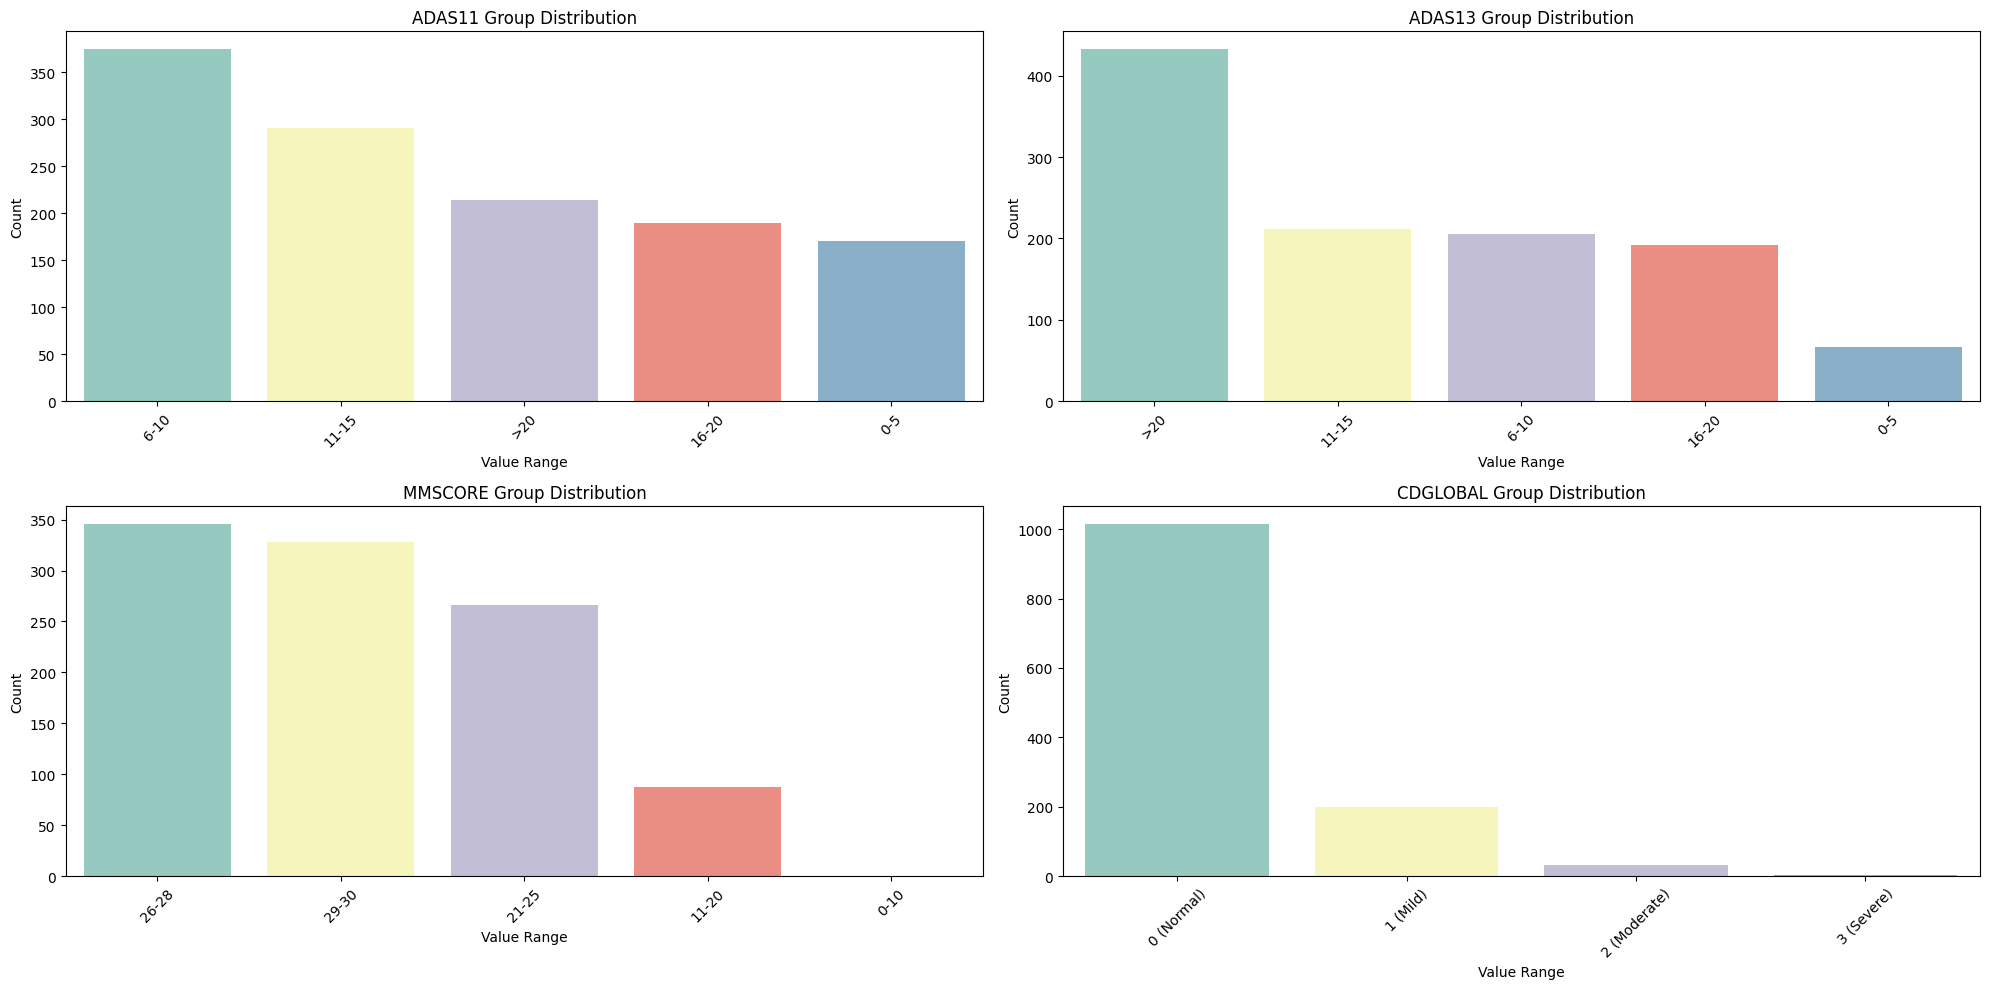

In [23]:
df_cognitive['ADAS11_GROUP'] = pd.cut(df['ADAS11'], bins=[0, 5, 10, 15, 20, 35], 
                            labels=['0-5', '6-10', '11-15', '16-20', '>20'], right=False)
df_cognitive['ADAS13_GROUP'] = pd.cut(df['ADAS13'], bins=[0, 5, 10, 15, 20, 35], 
                            labels=['0-5', '6-10', '11-15', '16-20', '>20'], right=False)
df_cognitive['MMSCORE_GROUP'] = pd.cut(df['MMSCORE'], bins=[0, 10, 20, 25, 28, 30],
                             labels=['0-10', '11-20', '21-25', '26-28', '29-30'], right=False)
df_cognitive['CDGLOBAL_GROUP'] = pd.cut(df['CDGLOBAL'], bins=[-0.1, 0.5, 1.5, 2.5, 3.5], 
                              labels=['0 (Normal)', '1 (Mild)', '2 (Moderate)', '3 (Severe)'])

plt.figure(figsize=(20, 10))
def plot_group_dist(col_group, title):
    sns.countplot(x=col_group, data=df_cognitive, palette='Set3', order=df_cognitive[col_group].value_counts().index)
    plt.title(title)
    plt.xlabel("Value Range")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
plt.subplot(2, 2, 1)
plot_group_dist('ADAS11_GROUP', 'ADAS11 Group Distribution')
plt.subplot(2, 2, 2)
plot_group_dist('ADAS13_GROUP', 'ADAS13 Group Distribution')
plt.subplot(2, 2, 3)
plot_group_dist('MMSCORE_GROUP', 'MMSCORE Group Distribution')
plt.subplot(2, 2, 4)
plot_group_dist('CDGLOBAL_GROUP', 'CDGLOBAL Group Distribution')

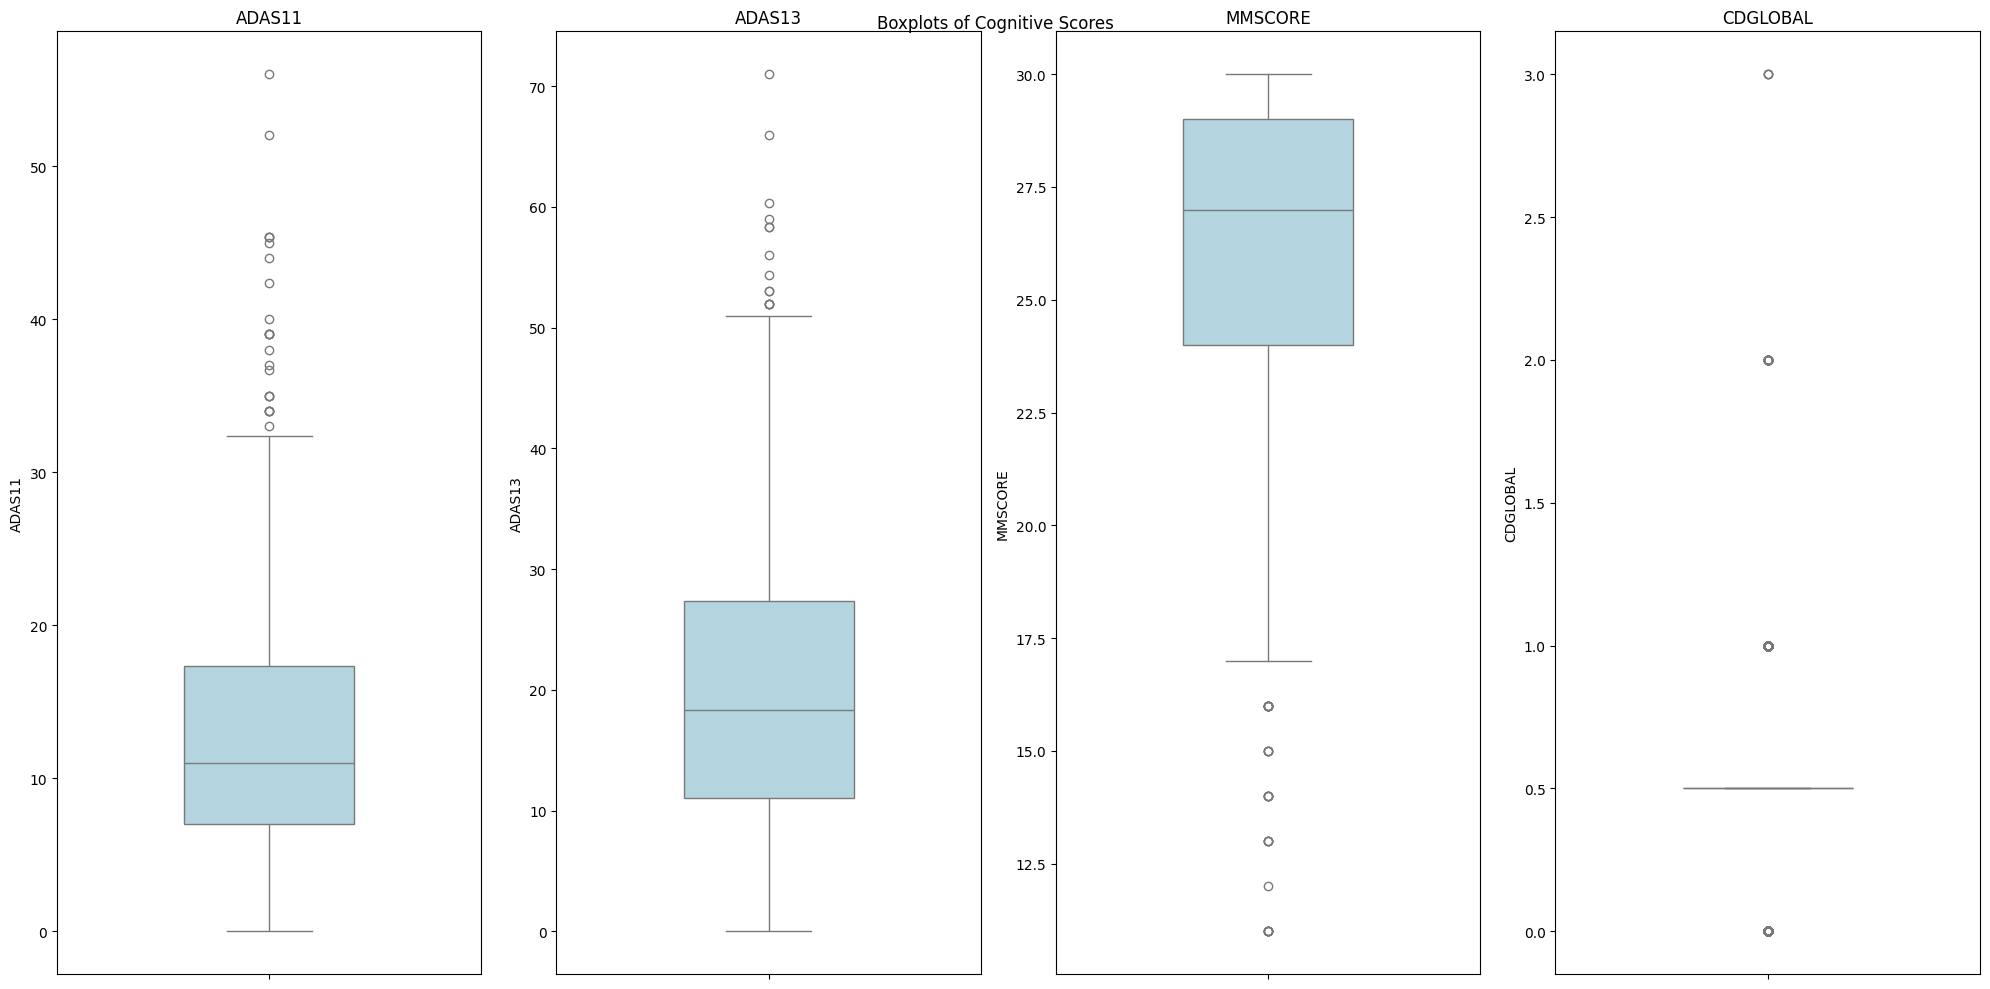

In [24]:
cols = ['ADAS11', 'ADAS13', 'MMSCORE', 'CDGLOBAL']
plt.figure(figsize=(20, 10))
for i, col in enumerate(cols):
    plt.subplot(1, 4, i + 1)
    sns.boxplot(y=df_cognitive[col], color='lightblue', width=0.4)
    plt.title(col)
    plt.tight_layout()
    
plt.suptitle("Boxplots of Cognitive Scores")
plt.show()

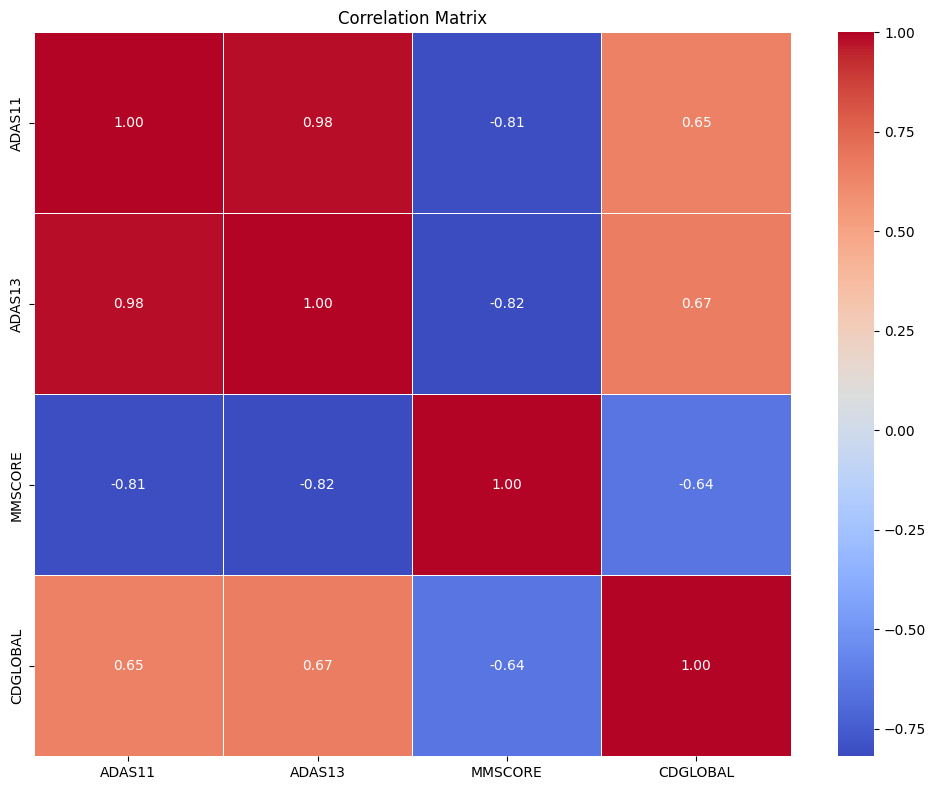

In [25]:
corr_matrix = df_cognitive[cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

# Kết hợp dữ liệu

## Đọc dữ liệu

Demographics data

In [26]:
demographics_df = pd.read_csv('../../data/new_c1_c2_demographics.csv')
demographics_df

,PTID,PTGENDER,PTDOBYY,PTEDUCAT
0,002_S_0295,1.0,1921.0,18.0
1,002_S_0559,1.0,1927.0,16.0
2,002_S_0816,1.0,1935.0,20.0
3,002_S_0954,2.0,1937.0,14.0
4,002_S_1018,2.0,1936.0,13.0
...,...,...,...,...
428,941_S_2060,2.0,1936.0,13.0
429,941_S_4100,2.0,1932.0,12.0
430,941_S_4292,1.0,1940.0,15.0
431,941_S_4764,2.0,1929.0,20.0


Cognitive data

In [27]:
cognitive_df = pd.read_csv('../../data/new_c1_c2_cognitive_score.csv')
cognitive_df

,PTID,VISCODE,VISCODE2,EXAMDATE,DIAGNOSIS,image_id,mri_date,ADAS11,ADAS13,MMSCORE,CDGLOBAL
0,002_S_0559,m06,m06,2006-12-27,1.0,32918,2006-12-12,6.00,11.00,29.0,0.0
1,002_S_0559,m12,m12,2007-07-20,1.0,78364,2007-10-18,4.67,7.67,29.0,0.0
2,002_S_0559,m24,m24,2008-08-25,1.0,116582,2008-08-15,7.33,12.33,30.0,0.0
3,002_S_0559,m36,m36,2009-07-09,1.0,147119,2009-06-30,5.67,8.67,29.0,0.0
4,002_S_0816,m06,m06,2007-04-13,3.0,47406,2007-03-28,13.67,22.67,26.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
1253,941_S_4100,v41,m48,2015-08-28,2.0,679931,2015-08-28,6.00,14.00,25.0,0.0
1254,941_S_4292,v05,m06,2012-07-20,1.0,311623,2012-06-20,9.00,13.00,27.0,0.0
1255,941_S_4292,v11,m12,2013-02-15,1.0,352773,2012-12-20,9.00,11.00,29.0,0.5
1256,941_S_4292,v21,m24,2013-10-02,1.0,391682,2013-09-23,4.00,7.00,28.0,0.5


Kết hợp dữ liệu

In [28]:
df_merge = pd.merge(cognitive_df, demographics_df, on='PTID', how='inner')
df_merge

,PTID,VISCODE,VISCODE2,EXAMDATE,DIAGNOSIS,image_id,mri_date,ADAS11,ADAS13,MMSCORE,CDGLOBAL,PTGENDER,PTDOBYY,PTEDUCAT
0,002_S_0559,m06,m06,2006-12-27,1.0,32918,2006-12-12,6.00,11.00,29.0,0.0,1.0,1927.0,16.0
1,002_S_0559,m12,m12,2007-07-20,1.0,78364,2007-10-18,4.67,7.67,29.0,0.0,1.0,1927.0,16.0
2,002_S_0559,m24,m24,2008-08-25,1.0,116582,2008-08-15,7.33,12.33,30.0,0.0,1.0,1927.0,16.0
3,002_S_0559,m36,m36,2009-07-09,1.0,147119,2009-06-30,5.67,8.67,29.0,0.0,1.0,1927.0,16.0
4,002_S_0816,m06,m06,2007-04-13,3.0,47406,2007-03-28,13.67,22.67,26.0,1.0,1.0,1935.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,941_S_4100,v41,m48,2015-08-28,2.0,679931,2015-08-28,6.00,14.00,25.0,0.0,2.0,1932.0,12.0
1254,941_S_4292,v05,m06,2012-07-20,1.0,311623,2012-06-20,9.00,13.00,27.0,0.0,1.0,1940.0,15.0
1255,941_S_4292,v11,m12,2013-02-15,1.0,352773,2012-12-20,9.00,11.00,29.0,0.5,1.0,1940.0,15.0
1256,941_S_4292,v21,m24,2013-10-02,1.0,391682,2013-09-23,4.00,7.00,28.0,0.5,1.0,1940.0,15.0


## Processing

Tính tuổi khi đi khám

In [29]:
df_merge['EXAMDATE'] = pd.to_datetime(df_merge['EXAMDATE'])
df_merge['AGE'] = df_merge['EXAMDATE'].dt.year - df_merge['PTDOBYY']
df_merge

,PTID,VISCODE,VISCODE2,EXAMDATE,DIAGNOSIS,image_id,mri_date,ADAS11,ADAS13,MMSCORE,CDGLOBAL,PTGENDER,PTDOBYY,PTEDUCAT,AGE
0,002_S_0559,m06,m06,2006-12-27,1.0,32918,2006-12-12,6.00,11.00,29.0,0.0,1.0,1927.0,16.0,79.0
1,002_S_0559,m12,m12,2007-07-20,1.0,78364,2007-10-18,4.67,7.67,29.0,0.0,1.0,1927.0,16.0,80.0
2,002_S_0559,m24,m24,2008-08-25,1.0,116582,2008-08-15,7.33,12.33,30.0,0.0,1.0,1927.0,16.0,81.0
3,002_S_0559,m36,m36,2009-07-09,1.0,147119,2009-06-30,5.67,8.67,29.0,0.0,1.0,1927.0,16.0,82.0
4,002_S_0816,m06,m06,2007-04-13,3.0,47406,2007-03-28,13.67,22.67,26.0,1.0,1.0,1935.0,20.0,72.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,941_S_4100,v41,m48,2015-08-28,2.0,679931,2015-08-28,6.00,14.00,25.0,0.0,2.0,1932.0,12.0,83.0
1254,941_S_4292,v05,m06,2012-07-20,1.0,311623,2012-06-20,9.00,13.00,27.0,0.0,1.0,1940.0,15.0,72.0
1255,941_S_4292,v11,m12,2013-02-15,1.0,352773,2012-12-20,9.00,11.00,29.0,0.5,1.0,1940.0,15.0,73.0
1256,941_S_4292,v21,m24,2013-10-02,1.0,391682,2013-09-23,4.00,7.00,28.0,0.5,1.0,1940.0,15.0,73.0


Lấy dữ liệu future

In [30]:
# Sắp xếp lại dữ liệu theo PTID và EXAMDATE
df_merge = df_merge.sort_values(['PTID', 'EXAMDATE'])

# Tìm giá trị của lần khám tiếp theo trong khoảng thời gian
from_month = 6
to_month = 18
def get_followup_values(group):
    followup_adas11 = []
    followup_adas13 = []
    followup_mmscore = []
    followup_cdglobal = []
    time_followup = []

    for i, row in group.iterrows():
        exam_date = row['EXAMDATE']
        future_rows = group[(group['EXAMDATE'] > exam_date) & 
                            (group['EXAMDATE'] >= exam_date + pd.Timedelta(days=from_month*30)) &
                            (group['EXAMDATE'] <= exam_date + pd.Timedelta(days=to_month*30))]

        if not future_rows.empty:
            next_row = future_rows.iloc[0]
            followup_adas11.append(next_row['ADAS11'])
            followup_adas13.append(next_row['ADAS13'])
            followup_mmscore.append(next_row['MMSCORE'])
            followup_cdglobal.append(next_row['CDGLOBAL'])
            time_followup.append(future_rows['EXAMDATE'].iloc[0] - exam_date)
        else:
            followup_adas11.append(np.nan)
            followup_adas13.append(np.nan)
            followup_mmscore.append(np.nan)
            followup_cdglobal.append(np.nan)
            time_followup.append(np.nan)

    group[f'ADAS11_{from_month}_{to_month}'] = followup_adas11
    group[f'ADAS13_{from_month}_{to_month}'] = followup_adas13
    group[f'MMSCORE_{from_month}_{to_month}'] = followup_mmscore
    group[f'CDGLOBAL_{from_month}_{to_month}'] = followup_cdglobal
    group[f'TIME_FOLLOWUP'] = time_followup
    return group

# Apply theo từng PTID
df = df_merge.groupby('PTID').apply(get_followup_values).reset_index(drop=True)

In [31]:
df

,PTID,VISCODE,VISCODE2,EXAMDATE,DIAGNOSIS,image_id,mri_date,ADAS11,ADAS13,MMSCORE,CDGLOBAL,PTGENDER,PTDOBYY,PTEDUCAT,AGE,ADAS11_6_18,ADAS13_6_18,MMSCORE_6_18,CDGLOBAL_6_18,TIME_FOLLOWUP
0,002_S_0559,m06,m06,2006-12-27,1.0,32918,2006-12-12,6.00,11.00,29.0,0.0,1.0,1927.0,16.0,79.0,4.67,7.67,29.0,0.0,205 days
1,002_S_0559,m12,m12,2007-07-20,1.0,78364,2007-10-18,4.67,7.67,29.0,0.0,1.0,1927.0,16.0,80.0,7.33,12.33,30.0,0.0,402 days
2,002_S_0559,m24,m24,2008-08-25,1.0,116582,2008-08-15,7.33,12.33,30.0,0.0,1.0,1927.0,16.0,81.0,5.67,8.67,29.0,0.0,318 days
3,002_S_0559,m36,m36,2009-07-09,1.0,147119,2009-06-30,5.67,8.67,29.0,0.0,1.0,1927.0,16.0,82.0,NaN,NaN,NaN,NaN,NaT
4,002_S_0816,m06,m06,2007-04-13,3.0,47406,2007-03-28,13.67,22.67,26.0,1.0,1.0,1935.0,20.0,72.0,NaN,NaN,NaN,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,941_S_4100,v41,m48,2015-08-28,2.0,679931,2015-08-28,6.00,14.00,25.0,0.0,2.0,1932.0,12.0,83.0,NaN,NaN,NaN,NaN,NaT
1254,941_S_4292,v05,m06,2012-07-20,1.0,311623,2012-06-20,9.00,13.00,27.0,0.0,1.0,1940.0,15.0,72.0,9.00,11.00,29.0,0.5,210 days
1255,941_S_4292,v11,m12,2013-02-15,1.0,352773,2012-12-20,9.00,11.00,29.0,0.5,1.0,1940.0,15.0,73.0,4.00,7.00,28.0,0.5,229 days
1256,941_S_4292,v21,m24,2013-10-02,1.0,391682,2013-09-23,4.00,7.00,28.0,0.5,1.0,1940.0,15.0,73.0,NaN,NaN,NaN,NaN,NaT


Loại các dữ liệu không thỏa mãn (NaN)

In [32]:
df = df.dropna()
df

,PTID,VISCODE,VISCODE2,EXAMDATE,DIAGNOSIS,image_id,mri_date,ADAS11,ADAS13,MMSCORE,CDGLOBAL,PTGENDER,PTDOBYY,PTEDUCAT,AGE,ADAS11_6_18,ADAS13_6_18,MMSCORE_6_18,CDGLOBAL_6_18,TIME_FOLLOWUP
0,002_S_0559,m06,m06,2006-12-27,1.0,32918,2006-12-12,6.00,11.00,29.0,0.0,1.0,1927.0,16.0,79.0,4.67,7.67,29.0,0.0,205 days
1,002_S_0559,m12,m12,2007-07-20,1.0,78364,2007-10-18,4.67,7.67,29.0,0.0,1.0,1927.0,16.0,80.0,7.33,12.33,30.0,0.0,402 days
2,002_S_0559,m24,m24,2008-08-25,1.0,116582,2008-08-15,7.33,12.33,30.0,0.0,1.0,1927.0,16.0,81.0,5.67,8.67,29.0,0.0,318 days
5,002_S_0954,m06,m06,2007-05-09,2.0,53479,2007-05-03,14.33,25.33,24.0,0.5,2.0,1937.0,14.0,70.0,15.33,26.33,27.0,1.0,408 days
6,002_S_0954,m12,m12,2007-10-19,3.0,78104,2007-10-17,17.00,27.00,26.0,0.5,2.0,1937.0,14.0,70.0,15.33,26.33,27.0,1.0,245 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1246,941_S_1311,m06,m06,2007-09-17,2.0,76269,2007-09-27,12.00,17.00,27.0,0.5,1.0,1938.0,12.0,69.0,11.67,19.67,27.0,1.0,219 days
1247,941_S_1311,m12,m12,2008-04-23,3.0,108463,2008-06-01,11.67,19.67,27.0,1.0,1.0,1938.0,12.0,70.0,17.67,27.67,27.0,1.0,341 days
1252,941_S_4100,v21,m24,2014-07-03,1.0,389419,2013-08-30,6.00,10.00,30.0,0.0,2.0,1932.0,12.0,82.0,6.00,14.00,25.0,0.0,421 days
1254,941_S_4292,v05,m06,2012-07-20,1.0,311623,2012-06-20,9.00,13.00,27.0,0.0,1.0,1940.0,15.0,72.0,9.00,11.00,29.0,0.5,210 days


Chuẩn hóa dữ liệu
- ADAS11: [0, 70]
- ADAS13: [0, 85]
- MMSCORE: [0, 30]
- CDGLOBAL: [0, 3]
- AGE: [50, 100]
- PTEDUCAT: [5, 25]
- TIME_FOLLOWUP: [0, 30]

In [33]:
# Chuẩn hóa dữ liệu theo min-max
df_test = df.copy()
df_test[['ADAS11', 'ADAS11_6_18']] = df_test[['ADAS11', 'ADAS11_6_18']].apply(lambda x: x/70)
df_test[['ADAS13', 'ADAS13_6_18']] = df_test[['ADAS13', 'ADAS13_6_18']].apply(lambda x: x/85)
df_test[['MMSCORE', 'MMSCORE_6_18']] = df_test[['MMSCORE', 'MMSCORE_6_18']].apply(lambda x: x/30)
df_test[['CDGLOBAL', 'CDGLOBAL_6_18']] = df_test[['CDGLOBAL', 'CDGLOBAL_6_18']].apply(lambda x: x/3)
# Chuẩn hóa tuổi
df_test['AGE'] = (df_test['AGE'] - 50) / (100 - 50)
# Chuẩn hóa trình độ học vấn
df_test['PTEDUCAT'] = (df_test['PTEDUCAT'] - 5) / (25 - 5)
# Chuẩn hóa thời gian theo dõi
df_test['TIME_FOLLOWUP'] = df_test['TIME_FOLLOWUP'].apply(lambda x: x.days / 30 if pd.notnull(x) else x)
df_test

,PTID,VISCODE,VISCODE2,EXAMDATE,DIAGNOSIS,image_id,mri_date,ADAS11,ADAS13,MMSCORE,CDGLOBAL,PTGENDER,PTDOBYY,PTEDUCAT,AGE,ADAS11_6_18,ADAS13_6_18,MMSCORE_6_18,CDGLOBAL_6_18,TIME_FOLLOWUP
0,002_S_0559,m06,m06,2006-12-27,1.0,32918,2006-12-12,0.085714,0.129412,0.966667,0.000000,1.0,1927.0,0.55,0.58,0.066714,0.090235,0.966667,0.000000,6.833333
1,002_S_0559,m12,m12,2007-07-20,1.0,78364,2007-10-18,0.066714,0.090235,0.966667,0.000000,1.0,1927.0,0.55,0.60,0.104714,0.145059,1.000000,0.000000,13.400000
2,002_S_0559,m24,m24,2008-08-25,1.0,116582,2008-08-15,0.104714,0.145059,1.000000,0.000000,1.0,1927.0,0.55,0.62,0.081000,0.102000,0.966667,0.000000,10.600000
5,002_S_0954,m06,m06,2007-05-09,2.0,53479,2007-05-03,0.204714,0.298000,0.800000,0.166667,2.0,1937.0,0.45,0.40,0.219000,0.309765,0.900000,0.333333,13.600000
6,002_S_0954,m12,m12,2007-10-19,3.0,78104,2007-10-17,0.242857,0.317647,0.866667,0.166667,2.0,1937.0,0.45,0.40,0.219000,0.309765,0.900000,0.333333,8.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1246,941_S_1311,m06,m06,2007-09-17,2.0,76269,2007-09-27,0.171429,0.200000,0.900000,0.166667,1.0,1938.0,0.35,0.38,0.166714,0.231412,0.900000,0.333333,7.300000
1247,941_S_1311,m12,m12,2008-04-23,3.0,108463,2008-06-01,0.166714,0.231412,0.900000,0.333333,1.0,1938.0,0.35,0.40,0.252429,0.325529,0.900000,0.333333,11.366667
1252,941_S_4100,v21,m24,2014-07-03,1.0,389419,2013-08-30,0.085714,0.117647,1.000000,0.000000,2.0,1932.0,0.35,0.64,0.085714,0.164706,0.833333,0.000000,14.033333
1254,941_S_4292,v05,m06,2012-07-20,1.0,311623,2012-06-20,0.128571,0.152941,0.900000,0.000000,1.0,1940.0,0.50,0.44,0.128571,0.129412,0.966667,0.166667,7.000000


Tìm số bệnh nhân

In [35]:
count = df_test['PTID'].value_counts()
count.unique()
count.shape

(254,)

Lấy dữ liệu khoảng cách giữa examidate và mridate cách nhau 1 tháng

In [36]:
df = df_test.copy()
df['mri_date'] = pd.to_datetime(df['mri_date'])
df['EXAMDATE'] = pd.to_datetime(df['EXAMDATE'])
df

,PTID,VISCODE,VISCODE2,EXAMDATE,DIAGNOSIS,image_id,mri_date,ADAS11,ADAS13,MMSCORE,CDGLOBAL,PTGENDER,PTDOBYY,PTEDUCAT,AGE,ADAS11_6_18,ADAS13_6_18,MMSCORE_6_18,CDGLOBAL_6_18,TIME_FOLLOWUP
0,002_S_0559,m06,m06,2006-12-27,1.0,32918,2006-12-12,0.085714,0.129412,0.966667,0.000000,1.0,1927.0,0.55,0.58,0.066714,0.090235,0.966667,0.000000,6.833333
1,002_S_0559,m12,m12,2007-07-20,1.0,78364,2007-10-18,0.066714,0.090235,0.966667,0.000000,1.0,1927.0,0.55,0.60,0.104714,0.145059,1.000000,0.000000,13.400000
2,002_S_0559,m24,m24,2008-08-25,1.0,116582,2008-08-15,0.104714,0.145059,1.000000,0.000000,1.0,1927.0,0.55,0.62,0.081000,0.102000,0.966667,0.000000,10.600000
5,002_S_0954,m06,m06,2007-05-09,2.0,53479,2007-05-03,0.204714,0.298000,0.800000,0.166667,2.0,1937.0,0.45,0.40,0.219000,0.309765,0.900000,0.333333,13.600000
6,002_S_0954,m12,m12,2007-10-19,3.0,78104,2007-10-17,0.242857,0.317647,0.866667,0.166667,2.0,1937.0,0.45,0.40,0.219000,0.309765,0.900000,0.333333,8.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1246,941_S_1311,m06,m06,2007-09-17,2.0,76269,2007-09-27,0.171429,0.200000,0.900000,0.166667,1.0,1938.0,0.35,0.38,0.166714,0.231412,0.900000,0.333333,7.300000
1247,941_S_1311,m12,m12,2008-04-23,3.0,108463,2008-06-01,0.166714,0.231412,0.900000,0.333333,1.0,1938.0,0.35,0.40,0.252429,0.325529,0.900000,0.333333,11.366667
1252,941_S_4100,v21,m24,2014-07-03,1.0,389419,2013-08-30,0.085714,0.117647,1.000000,0.000000,2.0,1932.0,0.35,0.64,0.085714,0.164706,0.833333,0.000000,14.033333
1254,941_S_4292,v05,m06,2012-07-20,1.0,311623,2012-06-20,0.128571,0.152941,0.900000,0.000000,1.0,1940.0,0.50,0.44,0.128571,0.129412,0.966667,0.166667,7.000000


In [37]:
# Loại các giá trị khi mri_date lớn hơn EXAMDATE khoảng 1 tháng
df_cp = df.copy()
month = 1
df_cp = df_cp[df_cp['mri_date'] - df_cp['EXAMDATE'] <= pd.Timedelta(days=month*30)]
df_cp = df_cp[df_cp['mri_date'] - df_cp['EXAMDATE'] >= pd.Timedelta(days=-month*30)]
df_cp

,PTID,VISCODE,VISCODE2,EXAMDATE,DIAGNOSIS,image_id,mri_date,ADAS11,ADAS13,MMSCORE,CDGLOBAL,PTGENDER,PTDOBYY,PTEDUCAT,AGE,ADAS11_6_18,ADAS13_6_18,MMSCORE_6_18,CDGLOBAL_6_18,TIME_FOLLOWUP
0,002_S_0559,m06,m06,2006-12-27,1.0,32918,2006-12-12,0.085714,0.129412,0.966667,0.000000,1.0,1927.0,0.55,0.58,0.066714,0.090235,0.966667,0.000000,6.833333
2,002_S_0559,m24,m24,2008-08-25,1.0,116582,2008-08-15,0.104714,0.145059,1.000000,0.000000,1.0,1927.0,0.55,0.62,0.081000,0.102000,0.966667,0.000000,10.600000
5,002_S_0954,m06,m06,2007-05-09,2.0,53479,2007-05-03,0.204714,0.298000,0.800000,0.166667,2.0,1937.0,0.45,0.40,0.219000,0.309765,0.900000,0.333333,13.600000
6,002_S_0954,m12,m12,2007-10-19,3.0,78104,2007-10-17,0.242857,0.317647,0.866667,0.166667,2.0,1937.0,0.45,0.40,0.219000,0.309765,0.900000,0.333333,8.166667
8,002_S_1018,m12,m12,2007-12-07,3.0,84444,2007-12-07,0.119000,0.192118,0.966667,0.166667,2.0,1936.0,0.40,0.42,0.171429,0.247059,0.900000,0.166667,13.066667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,941_S_1202,v06,m48,2011-06-27,2.0,240936,2011-06-16,0.185714,0.258824,0.900000,0.000000,1.0,1929.0,0.65,0.64,0.128571,0.200000,0.900000,0.166667,12.600000
1241,941_S_1203,m24,m24,2009-02-24,1.0,137051,2009-02-25,0.104714,0.145059,1.000000,0.000000,1.0,1923.0,0.50,0.72,0.057143,0.117647,0.966667,0.166667,14.733333
1244,941_S_1295,m06,m06,2007-08-14,2.0,69872,2007-08-21,0.157143,0.235294,0.833333,0.166667,1.0,1930.0,0.55,0.54,0.195286,0.254941,0.833333,0.166667,12.400000
1246,941_S_1311,m06,m06,2007-09-17,2.0,76269,2007-09-27,0.171429,0.200000,0.900000,0.166667,1.0,1938.0,0.35,0.38,0.166714,0.231412,0.900000,0.333333,7.300000


In [39]:
adas11 = df_cp['ADAS11'].values*70
adas13 = df_cp['ADAS13'].values*85
mmscore = df_cp['MMSCORE'].values*30
cdglobal = df_cp['CDGLOBAL'].values*3
adas11_followup = df_cp['ADAS11_6_18'].values*70
adas13_followup = df_cp['ADAS13_6_18'].values*85
mmscore_followup = df_cp['MMSCORE_6_18'].values*30
cdglobal_followup = df_cp['CDGLOBAL_6_18'].values*3

print("Current data:")
print(f"    ADAS11: Min={np.min(adas11)}, Max={np.max(adas11)}, Mean={np.mean(adas11)}, Std={np.std(adas11)}")
print(f"    ADAS13: Min={np.min(adas13)}, Max={np.max(adas13)}, Mean={np.mean(adas13)}, Std={np.std(adas13)}")
print(f"    MMSCORE: Min={np.min(mmscore)}, Max={np.max(mmscore)}, Mean={np.mean(mmscore)}, Std={np.std(mmscore)}")
print(f"    CDGLOBAL: Min={np.min(cdglobal)}, Max={np.max(cdglobal)}, Mean={np.mean(cdglobal)}, Std={np.std(cdglobal)}")
print("Follow-up data:")
print(f"    ADAS11: Min={np.min(adas11_followup)}, Max={np.max(adas11_followup)}, Mean={np.mean(adas11_followup)}, Std={np.std(adas11_followup)}")
print(f"    ADAS13: Min={np.min(adas13_followup)}, Max={np.max(adas13_followup)}, Mean={np.mean(adas13_followup)}, Std={np.std(adas13_followup)}")
print(f"    MMSCORE: Min={np.min(mmscore_followup)}, Max={np.max(mmscore_followup)}, Mean={np.mean(mmscore_followup)}, Std={np.std(mmscore_followup)}")
print(f"    CDGLOBAL: Min={np.min(cdglobal_followup)}, Max={np.max(cdglobal_followup)}, Mean={np.mean(cdglobal_followup)}, Std={np.std(cdglobal_followup)}")

Current data:
    ADAS11: Min=1.0, Max=45.33, Mean=11.75464447806354, Std=6.781950308507767
    ADAS13: Min=2.0, Max=60.330000000000005, Mean=18.709258698941, Std=9.704735726285314
    MMSCORE: Min=11.0, Max=30.0, Mean=26.3661119515885, Std=3.3750443282157727
    CDGLOBAL: Min=0.0, Max=3.0, Mean=0.443267776096823, Std=0.3257077516595526
Follow-up data:
    ADAS11: Min=0.0, Max=56.0, Mean=13.199606656580938, Std=8.174323800051896
    ADAS13: Min=0.0, Max=71.0, Mean=20.656490166414525, Std=11.357240871247878
    MMSCORE: Min=11.0, Max=30.0, Mean=25.709531013615734, Std=3.946355478821662
    CDGLOBAL: Min=0.0, Max=2.0, Mean=0.529500756429652, Std=0.42371945598730915


## Analysis

In [40]:
print(f"Total unique PTID: {len(df_cp['PTID'].unique())}")
print(f"Total records: {df_cp.shape[0]}")

Total unique PTID: 242
Total records: 661


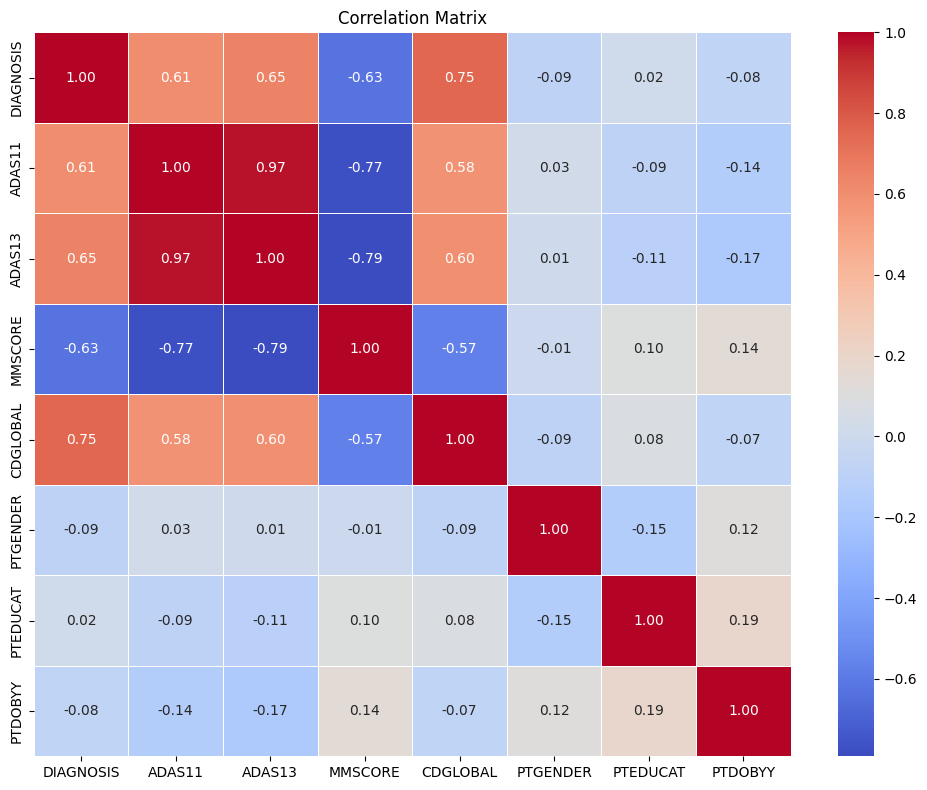

In [41]:
cols = ['DIAGNOSIS', 'ADAS11', 'ADAS13', 'MMSCORE', 
        'CDGLOBAL', 'PTGENDER', 'PTEDUCAT', 'PTDOBYY']
corr_matrix = df_cp[cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

In [43]:
def plot_distribution(col, title):
    sns.histplot(df_cp[col], kde=True, color='skyblue', bins=30)
    plt.title(title)
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.tight_layout()

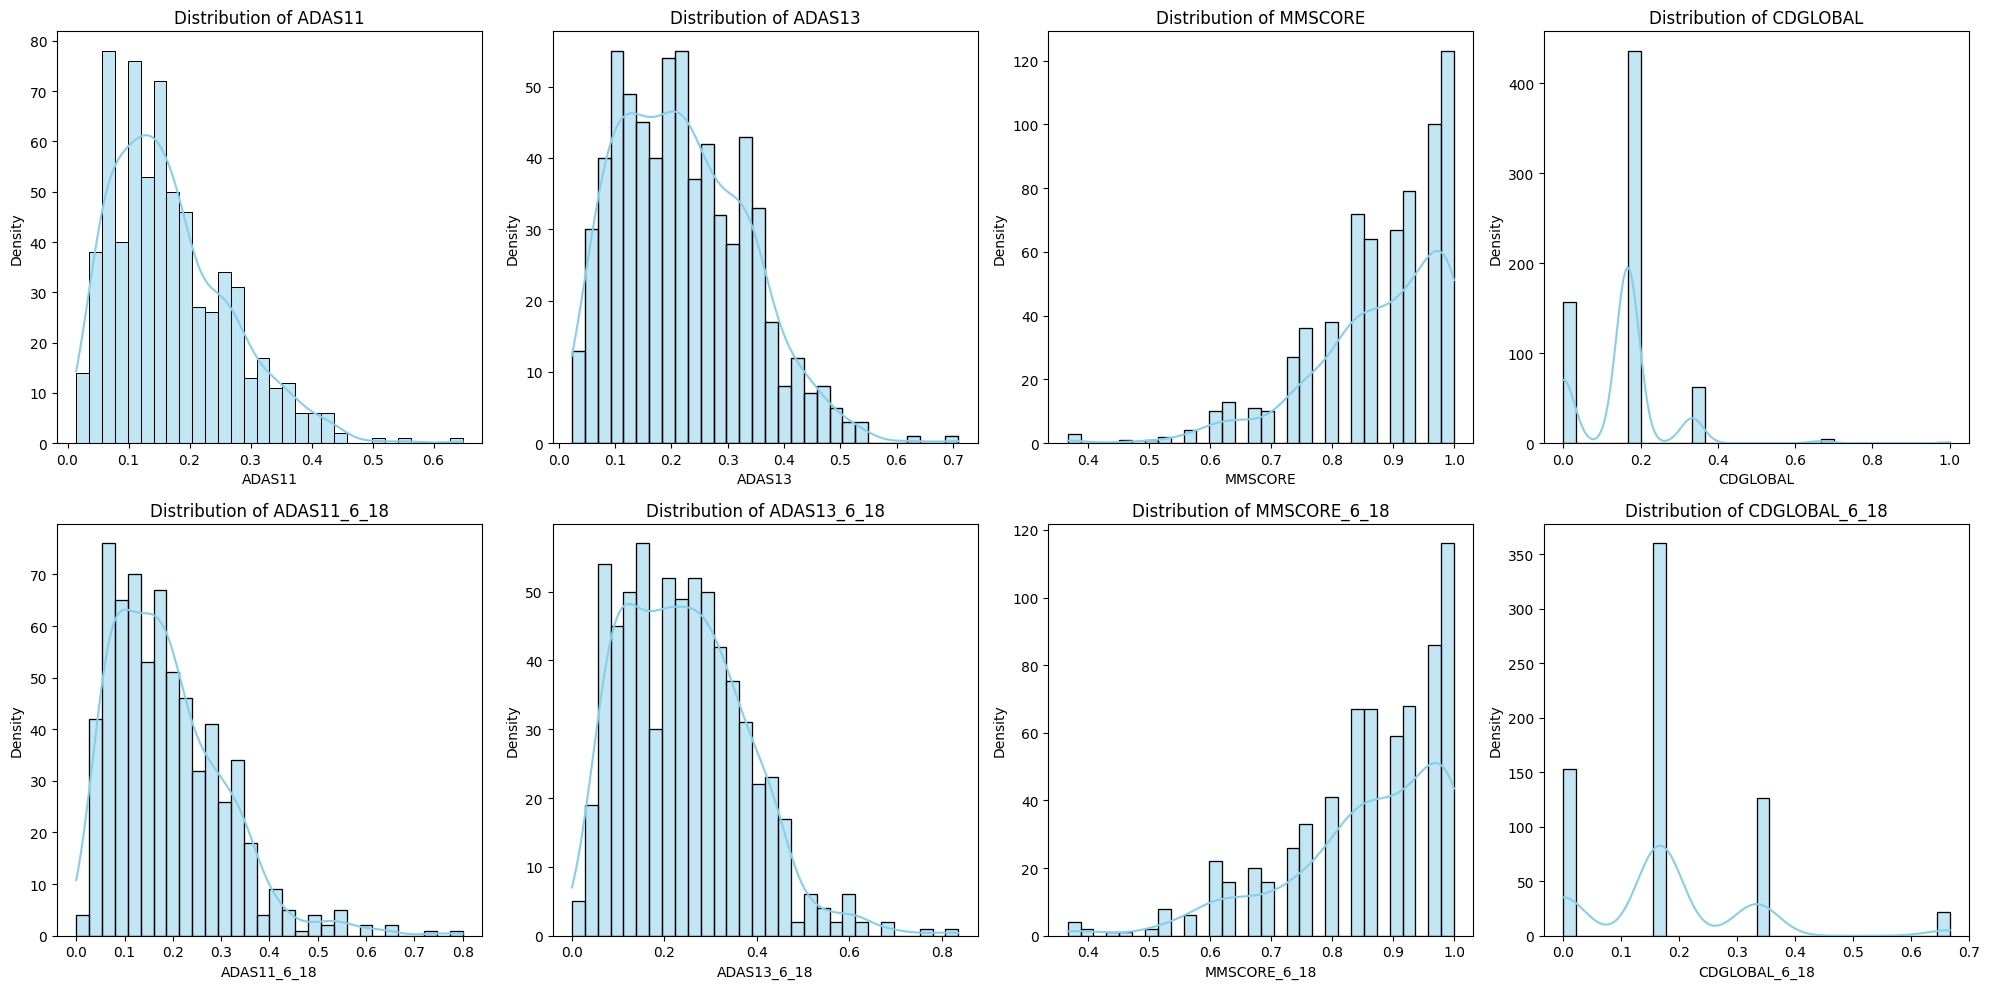

In [44]:
# Trực quan hóa các cột dữ liệu hiện tại
plt.figure(figsize=(20, 10))
cols = ['ADAS11', 'ADAS13', 'MMSCORE', 'CDGLOBAL', 
        'ADAS11_6_18', 'ADAS13_6_18', 'MMSCORE_6_18', 'CDGLOBAL_6_18']
for i, col in enumerate(cols):
    plt.subplot(2, 4, i + 1)
    plot_distribution(col, f"Distribution of {col}")

# Trực quan hóa dữ liệu

In [45]:
df = df_cp.copy()
df

,PTID,VISCODE,VISCODE2,EXAMDATE,DIAGNOSIS,image_id,mri_date,ADAS11,ADAS13,MMSCORE,CDGLOBAL,PTGENDER,PTDOBYY,PTEDUCAT,AGE,ADAS11_6_18,ADAS13_6_18,MMSCORE_6_18,CDGLOBAL_6_18,TIME_FOLLOWUP
0,002_S_0559,m06,m06,2006-12-27,1.0,32918,2006-12-12,0.085714,0.129412,0.966667,0.000000,1.0,1927.0,0.55,0.58,0.066714,0.090235,0.966667,0.000000,6.833333
2,002_S_0559,m24,m24,2008-08-25,1.0,116582,2008-08-15,0.104714,0.145059,1.000000,0.000000,1.0,1927.0,0.55,0.62,0.081000,0.102000,0.966667,0.000000,10.600000
5,002_S_0954,m06,m06,2007-05-09,2.0,53479,2007-05-03,0.204714,0.298000,0.800000,0.166667,2.0,1937.0,0.45,0.40,0.219000,0.309765,0.900000,0.333333,13.600000
6,002_S_0954,m12,m12,2007-10-19,3.0,78104,2007-10-17,0.242857,0.317647,0.866667,0.166667,2.0,1937.0,0.45,0.40,0.219000,0.309765,0.900000,0.333333,8.166667
8,002_S_1018,m12,m12,2007-12-07,3.0,84444,2007-12-07,0.119000,0.192118,0.966667,0.166667,2.0,1936.0,0.40,0.42,0.171429,0.247059,0.900000,0.166667,13.066667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,941_S_1202,v06,m48,2011-06-27,2.0,240936,2011-06-16,0.185714,0.258824,0.900000,0.000000,1.0,1929.0,0.65,0.64,0.128571,0.200000,0.900000,0.166667,12.600000
1241,941_S_1203,m24,m24,2009-02-24,1.0,137051,2009-02-25,0.104714,0.145059,1.000000,0.000000,1.0,1923.0,0.50,0.72,0.057143,0.117647,0.966667,0.166667,14.733333
1244,941_S_1295,m06,m06,2007-08-14,2.0,69872,2007-08-21,0.157143,0.235294,0.833333,0.166667,1.0,1930.0,0.55,0.54,0.195286,0.254941,0.833333,0.166667,12.400000
1246,941_S_1311,m06,m06,2007-09-17,2.0,76269,2007-09-27,0.171429,0.200000,0.900000,0.166667,1.0,1938.0,0.35,0.38,0.166714,0.231412,0.900000,0.333333,7.300000


In [46]:
demo_check = df[['PTID', 'PTGENDER', 'PTEDUCAT', 'AGE']]
demo_check

,PTID,PTGENDER,PTEDUCAT,AGE
0,002_S_0559,1.0,0.55,0.58
2,002_S_0559,1.0,0.55,0.62
5,002_S_0954,2.0,0.45,0.40
6,002_S_0954,2.0,0.45,0.40
8,002_S_1018,2.0,0.40,0.42
...,...,...,...,...
1238,941_S_1202,1.0,0.65,0.64
1241,941_S_1203,1.0,0.50,0.72
1244,941_S_1295,1.0,0.55,0.54
1246,941_S_1311,1.0,0.35,0.38


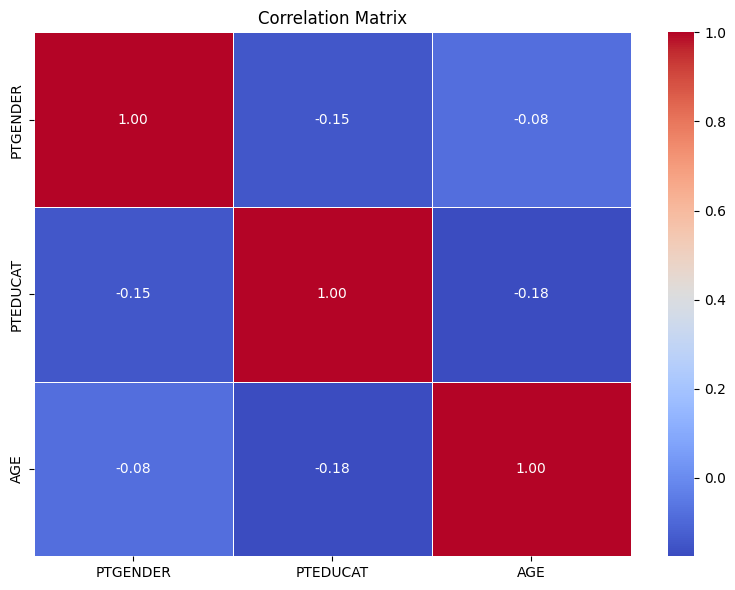

In [47]:
cols = ['PTGENDER', 'PTEDUCAT', 'AGE']
corr_matrix = demo_check[cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

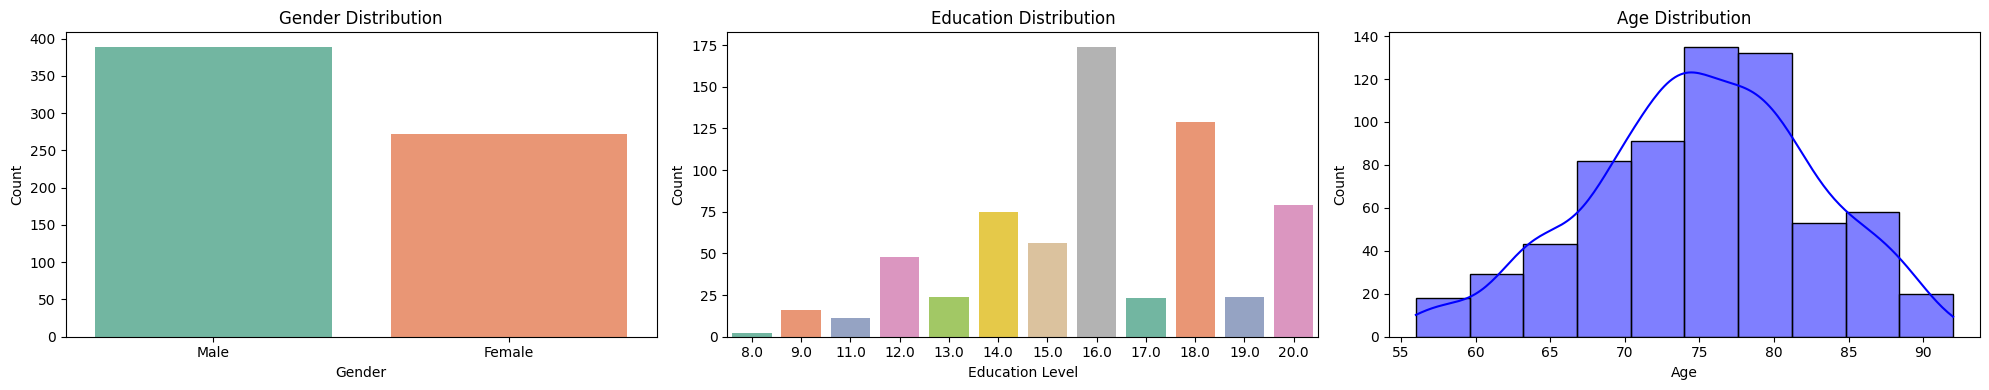

In [48]:
demo_check['PTGENDER'] = demo_check['PTGENDER'].map({1.0: 'Male', 2.0: 'Female'})
# Invert lại giá trị của PTEDUCAT
demo_check['PTEDUCAT'] = demo_check['PTEDUCAT'].apply(lambda x: x*(25-5)+5 if pd.notnull(x) else x)
demo_check['AGE'] = demo_check['AGE'].apply(lambda x: x*(100-50)+50 if pd.notnull(x) else x)
plt.figure(figsize=(20, 4))
plt.subplot(1, 3, 1)
sns.countplot(x='PTGENDER', data=demo_check, palette='Set2')
plt.title("Gender Distribution")   
plt.xlabel("Gender")
plt.ylabel("Count")
plt.subplot(1, 3, 2)
sns.countplot(x='PTEDUCAT', data=demo_check, palette='Set2')
plt.title("Education Distribution")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.subplot(1, 3, 3)
sns.histplot(demo_check['AGE'], bins=10, kde=True, color='blue')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

Min age: 56.0, Max age: 92.0


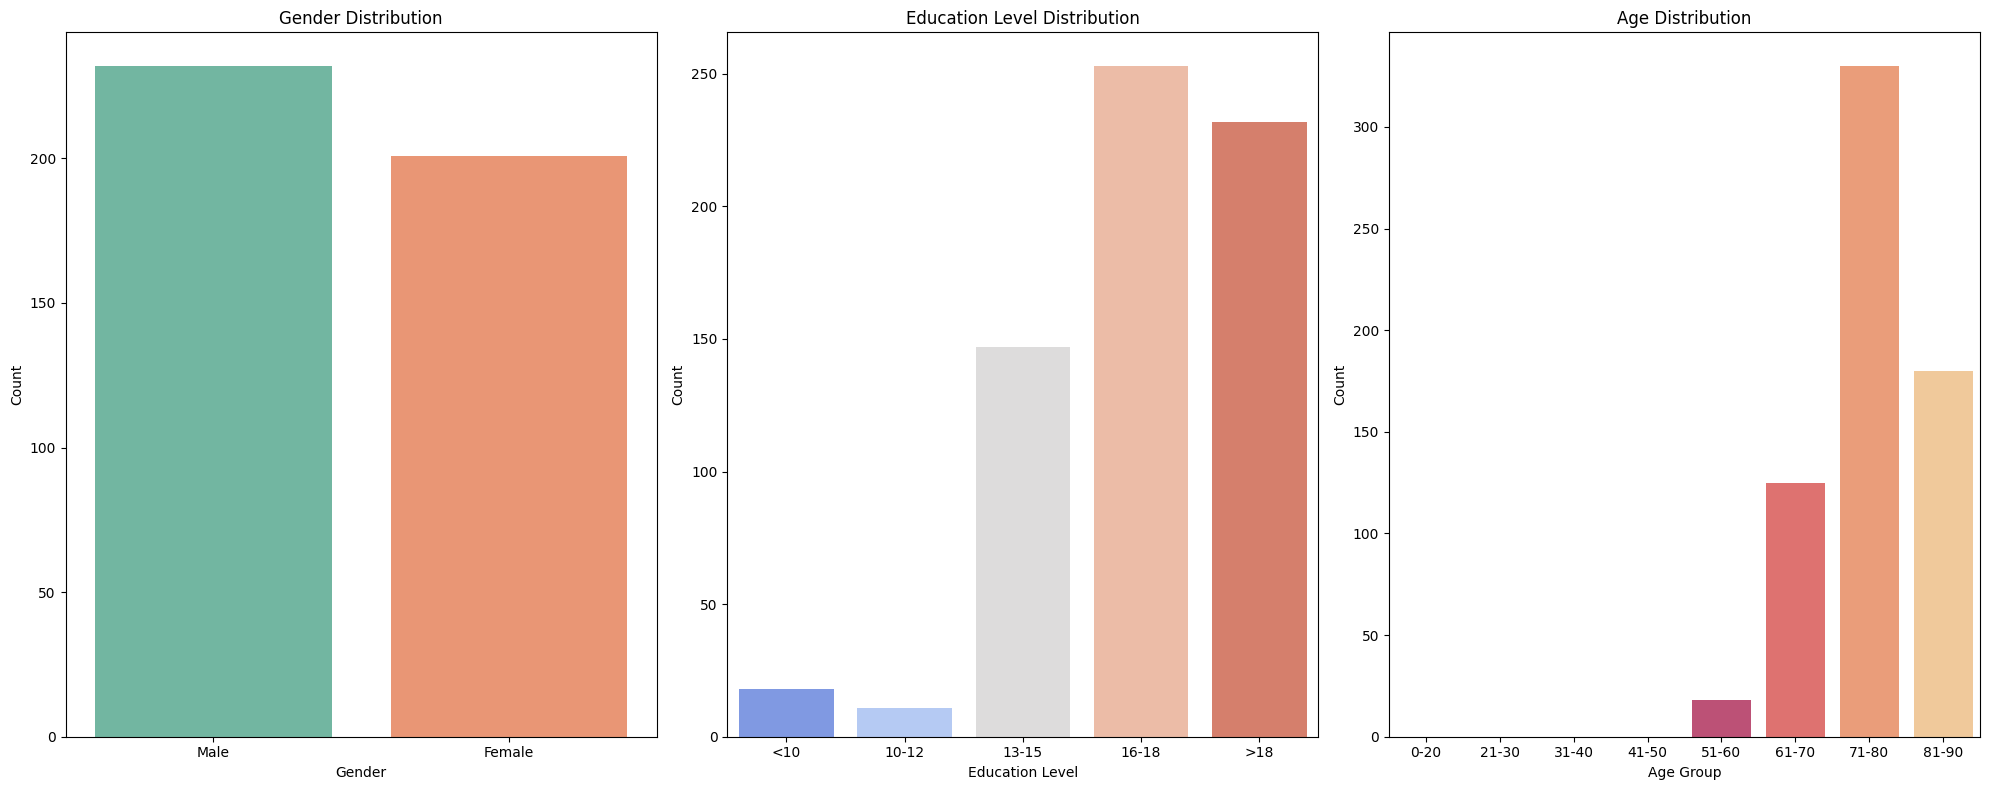

In [49]:
plt.figure(figsize=(20,8))

plt.subplot(1,3,1)
sns.countplot(x='PTGENDER', data=df_demographics, palette='Set2')
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")

# 2. PTEDUCAT
bins_edu = [0, 10, 12, 15, 18, 21]
labels_edu = ['<10', '10-12', '13-15', '16-18', '>18']
demo_check['EDU_GROUP'] = pd.cut(demo_check['PTEDUCAT'], bins=bins_edu, labels=labels_edu, right=False)

plt.subplot(1,3,2)
sns.countplot(x='EDU_GROUP', data=demo_check, palette='coolwarm')
plt.title("Education Level Distribution")
plt.xlabel("Education Level")
plt.ylabel("Count")

# 3. PTDBOBYY
min_age = demo_check['AGE'].min()
max_age = demo_check['AGE'].max()
print(f"Min age: {min_age}, Max age: {max_age}")
bins_age = [0, 20, 30, 40, 50, 60, 70, 80, 90]
labels_age = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90']
labels_birth = ['1910s', '1920s', '1930s', '1940s']
demo_check['AGE_GROUP'] = pd.cut(demo_check['AGE'], bins=bins_age, labels=labels_age, right=False)

plt.subplot(1,3,3)
sns.countplot(x='AGE_GROUP', data=demo_check, palette='magma')
plt.title("Age Distribution")
plt.xlabel("Age Group")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

In [50]:
score_check = df[['ADAS11', 'ADAS13', 'MMSCORE', 'CDGLOBAL']]
score_check

,ADAS11,ADAS13,MMSCORE,CDGLOBAL
0,0.085714,0.129412,0.966667,0.000000
2,0.104714,0.145059,1.000000,0.000000
5,0.204714,0.298000,0.800000,0.166667
6,0.242857,0.317647,0.866667,0.166667
8,0.119000,0.192118,0.966667,0.166667
...,...,...,...,...
1238,0.185714,0.258824,0.900000,0.000000
1241,0.104714,0.145059,1.000000,0.000000
1244,0.157143,0.235294,0.833333,0.166667
1246,0.171429,0.200000,0.900000,0.166667


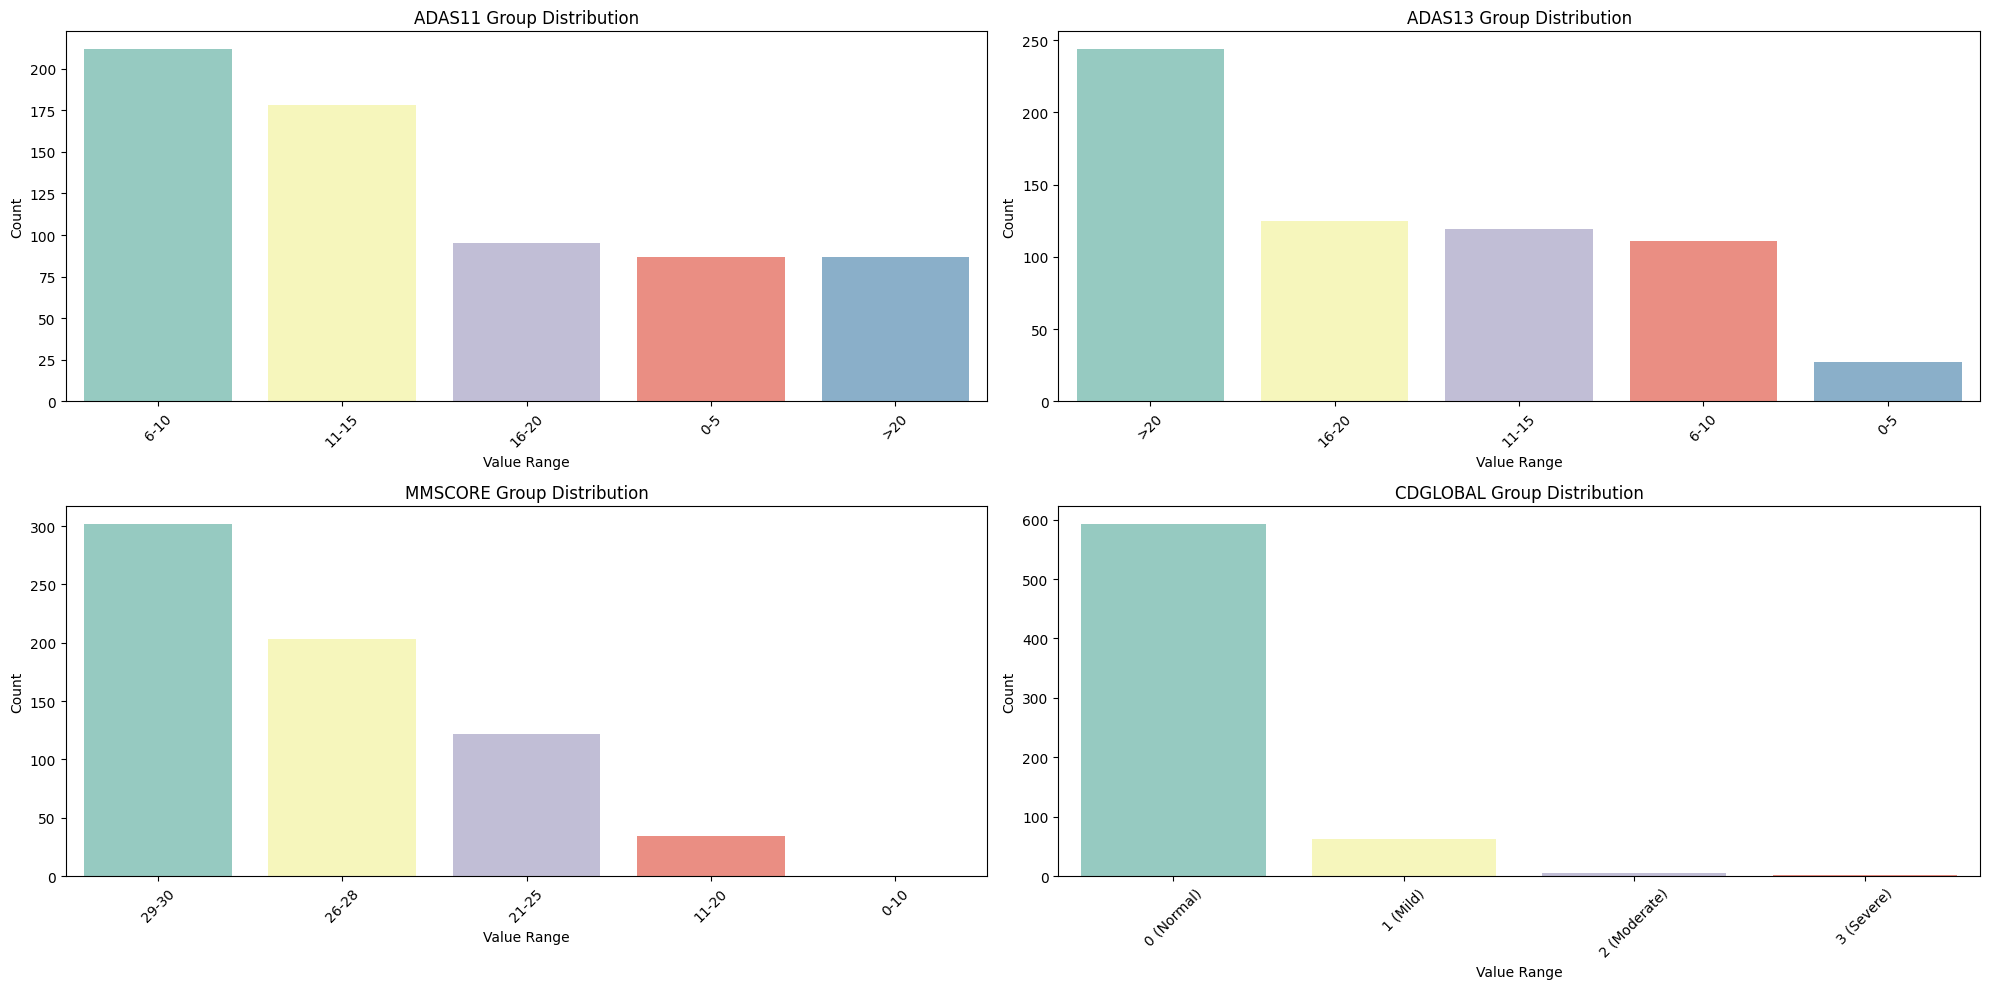

In [51]:
# Invert lại giá trị của các cột
score_check['ADAS11'] = score_check['ADAS11'].apply(lambda x: x*(70-0)+0 if pd.notnull(x) else x)
score_check['ADAS13'] = score_check['ADAS13'].apply(lambda x: x*(85-0)+0 if pd.notnull(x) else x)
score_check['MMSCORE'] = score_check['MMSCORE'].apply(lambda x: x*(30-0)+0 if pd.notnull(x) else x)
score_check['CDGLOBAL'] = score_check['CDGLOBAL'].apply(lambda x: x*(3-0)+0 if pd.notnull(x) else x)

score_check['ADAS11_GROUP'] = pd.cut(score_check['ADAS11'], bins=[0, 5, 10, 15, 20, 36], 
                            labels=['0-5', '6-10', '11-15', '16-20', '>20'], right=False)
score_check['ADAS13_GROUP'] = pd.cut(score_check['ADAS13'], bins=[0, 5, 10, 15, 20, 36], 
                            labels=['0-5', '6-10', '11-15', '16-20', '>20'], right=False)
score_check['MMSCORE_GROUP'] = pd.cut(score_check['MMSCORE'], bins=[0, 10, 20, 25, 28, 31],
                             labels=['0-10', '11-20', '21-25', '26-28', '29-30'], right=False)
score_check['CDGLOBAL_GROUP'] = pd.cut(score_check['CDGLOBAL'], bins=[-0.1, 0.5, 1.5, 2.5, 3.6], 
                              labels=['0 (Normal)', '1 (Mild)', '2 (Moderate)', '3 (Severe)'])

plt.figure(figsize=(20, 10))
def plot_group_dist(col_group, title):
    sns.countplot(x=col_group, data=score_check, palette='Set3', order=score_check[col_group].value_counts().index)
    plt.title(title)
    plt.xlabel("Value Range")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
plt.subplot(2, 2, 1)
plot_group_dist('ADAS11_GROUP', 'ADAS11 Group Distribution')
plt.subplot(2, 2, 2)
plot_group_dist('ADAS13_GROUP', 'ADAS13 Group Distribution')
plt.subplot(2, 2, 3)
plot_group_dist('MMSCORE_GROUP', 'MMSCORE Group Distribution')
plt.subplot(2, 2, 4)
plot_group_dist('CDGLOBAL_GROUP', 'CDGLOBAL Group Distribution')

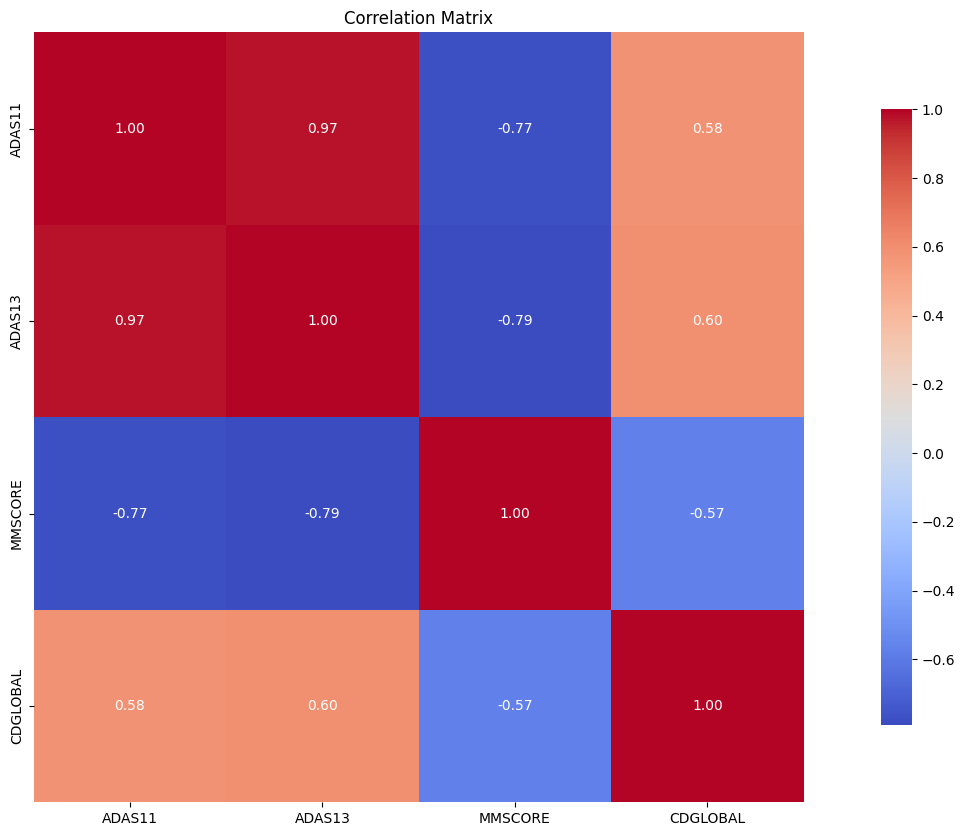

In [52]:
col = ['ADAS11', 'ADAS13', 'MMSCORE', 'CDGLOBAL']
corr_matrix = score_check[col].corr()
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title("Correlation Matrix")
plt.show()

In [53]:
test = df[['ADAS11', 'ADAS13', 'MMSCORE', 'CDGLOBAL', 'DIAGNOSIS']]
test

,ADAS11,ADAS13,MMSCORE,CDGLOBAL,DIAGNOSIS
0,0.085714,0.129412,0.966667,0.000000,1.0
2,0.104714,0.145059,1.000000,0.000000,1.0
5,0.204714,0.298000,0.800000,0.166667,2.0
6,0.242857,0.317647,0.866667,0.166667,3.0
8,0.119000,0.192118,0.966667,0.166667,3.0
...,...,...,...,...,...
1238,0.185714,0.258824,0.900000,0.000000,2.0
1241,0.104714,0.145059,1.000000,0.000000,1.0
1244,0.157143,0.235294,0.833333,0.166667,2.0
1246,0.171429,0.200000,0.900000,0.166667,2.0


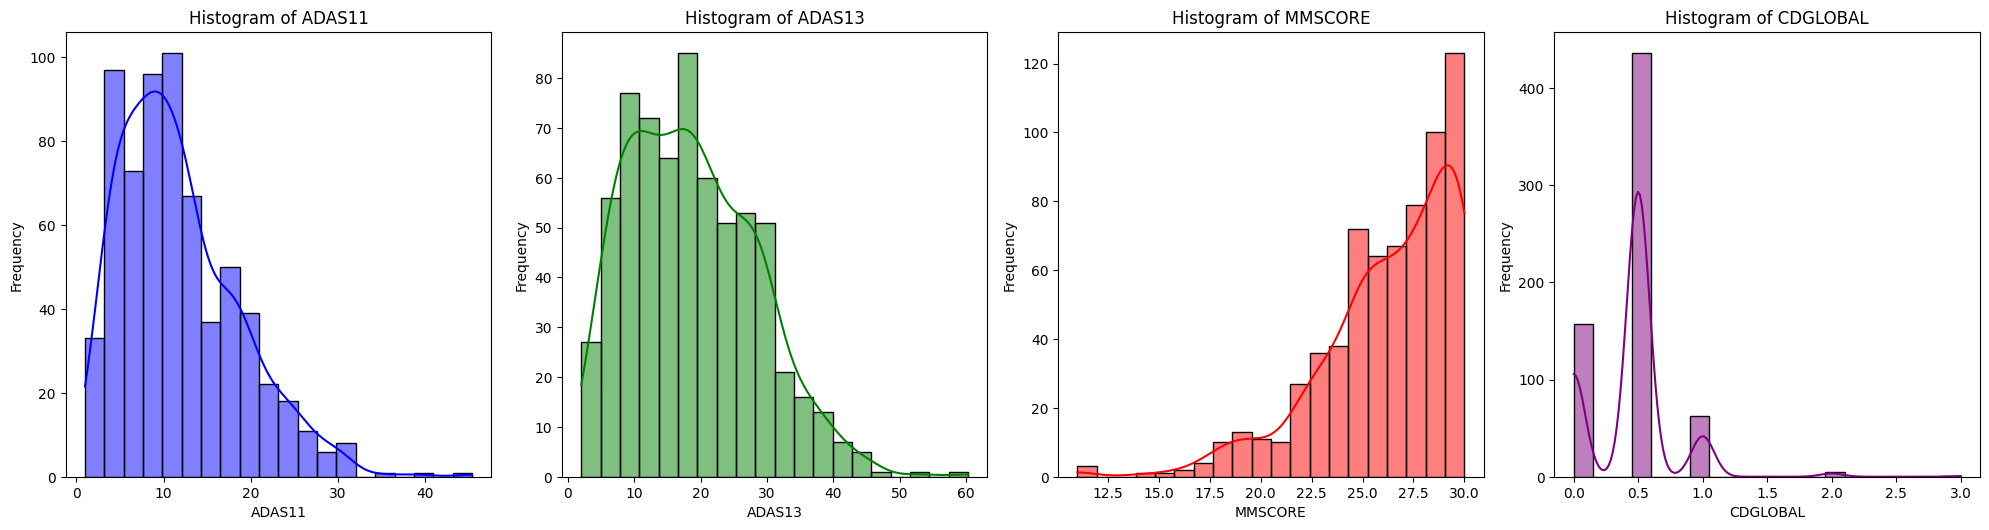

In [54]:
# Invert lại giá trị của các cột
test['ADAS11'] = test['ADAS11'].apply(lambda x: x*(70-0)+0 if pd.notnull(x) else x)
test['ADAS13'] = test['ADAS13'].apply(lambda x: x*(85-0)+0 if pd.notnull(x) else x)
test['MMSCORE'] = test['MMSCORE'].apply(lambda x: x*(30-0)+0 if pd.notnull(x) else x)
test['CDGLOBAL'] = test['CDGLOBAL'].apply(lambda x: x*(3-0)+0 if pd.notnull(x) else x)
# Plot các vùng giá trị của các cột với seaborn
plt.figure(figsize=(20, 10))
plt.subplot(2, 4, 1)
sns.histplot(test['ADAS11'], bins=20, color='blue', kde=True)
plt.title('Histogram of ADAS11')
plt.xlabel('ADAS11')
plt.ylabel('Frequency')
plt.subplot(2, 4, 2)
sns.histplot(test['ADAS13'], bins=20, color='green', kde=True)
plt.title('Histogram of ADAS13')
plt.xlabel('ADAS13')
plt.ylabel('Frequency')
plt.subplot(2, 4, 3)
sns.histplot(test['MMSCORE'], bins=20, color='red', kde=True)
plt.title('Histogram of MMSCORE')
plt.xlabel('MMSCORE')
plt.ylabel('Frequency')
plt.subplot(2, 4, 4)
sns.histplot(test['CDGLOBAL'], bins=20, color='purple', kde=True)
plt.title('Histogram of CDGLOBAL')
plt.xlabel('CDGLOBAL')
plt.ylabel('Frequency')


plt.tight_layout()
plt.show()

In [55]:
df_test = df.iloc[:, 7:]
df_test

,ADAS11,ADAS13,MMSCORE,CDGLOBAL,PTGENDER,PTDOBYY,PTEDUCAT,AGE,ADAS11_6_18,ADAS13_6_18,MMSCORE_6_18,CDGLOBAL_6_18,TIME_FOLLOWUP
0,0.085714,0.129412,0.966667,0.000000,1.0,1927.0,0.55,0.58,0.066714,0.090235,0.966667,0.000000,6.833333
2,0.104714,0.145059,1.000000,0.000000,1.0,1927.0,0.55,0.62,0.081000,0.102000,0.966667,0.000000,10.600000
5,0.204714,0.298000,0.800000,0.166667,2.0,1937.0,0.45,0.40,0.219000,0.309765,0.900000,0.333333,13.600000
6,0.242857,0.317647,0.866667,0.166667,2.0,1937.0,0.45,0.40,0.219000,0.309765,0.900000,0.333333,8.166667
8,0.119000,0.192118,0.966667,0.166667,2.0,1936.0,0.40,0.42,0.171429,0.247059,0.900000,0.166667,13.066667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,0.185714,0.258824,0.900000,0.000000,1.0,1929.0,0.65,0.64,0.128571,0.200000,0.900000,0.166667,12.600000
1241,0.104714,0.145059,1.000000,0.000000,1.0,1923.0,0.50,0.72,0.057143,0.117647,0.966667,0.166667,14.733333
1244,0.157143,0.235294,0.833333,0.166667,1.0,1930.0,0.55,0.54,0.195286,0.254941,0.833333,0.166667,12.400000
1246,0.171429,0.200000,0.900000,0.166667,1.0,1938.0,0.35,0.38,0.166714,0.231412,0.900000,0.333333,7.300000


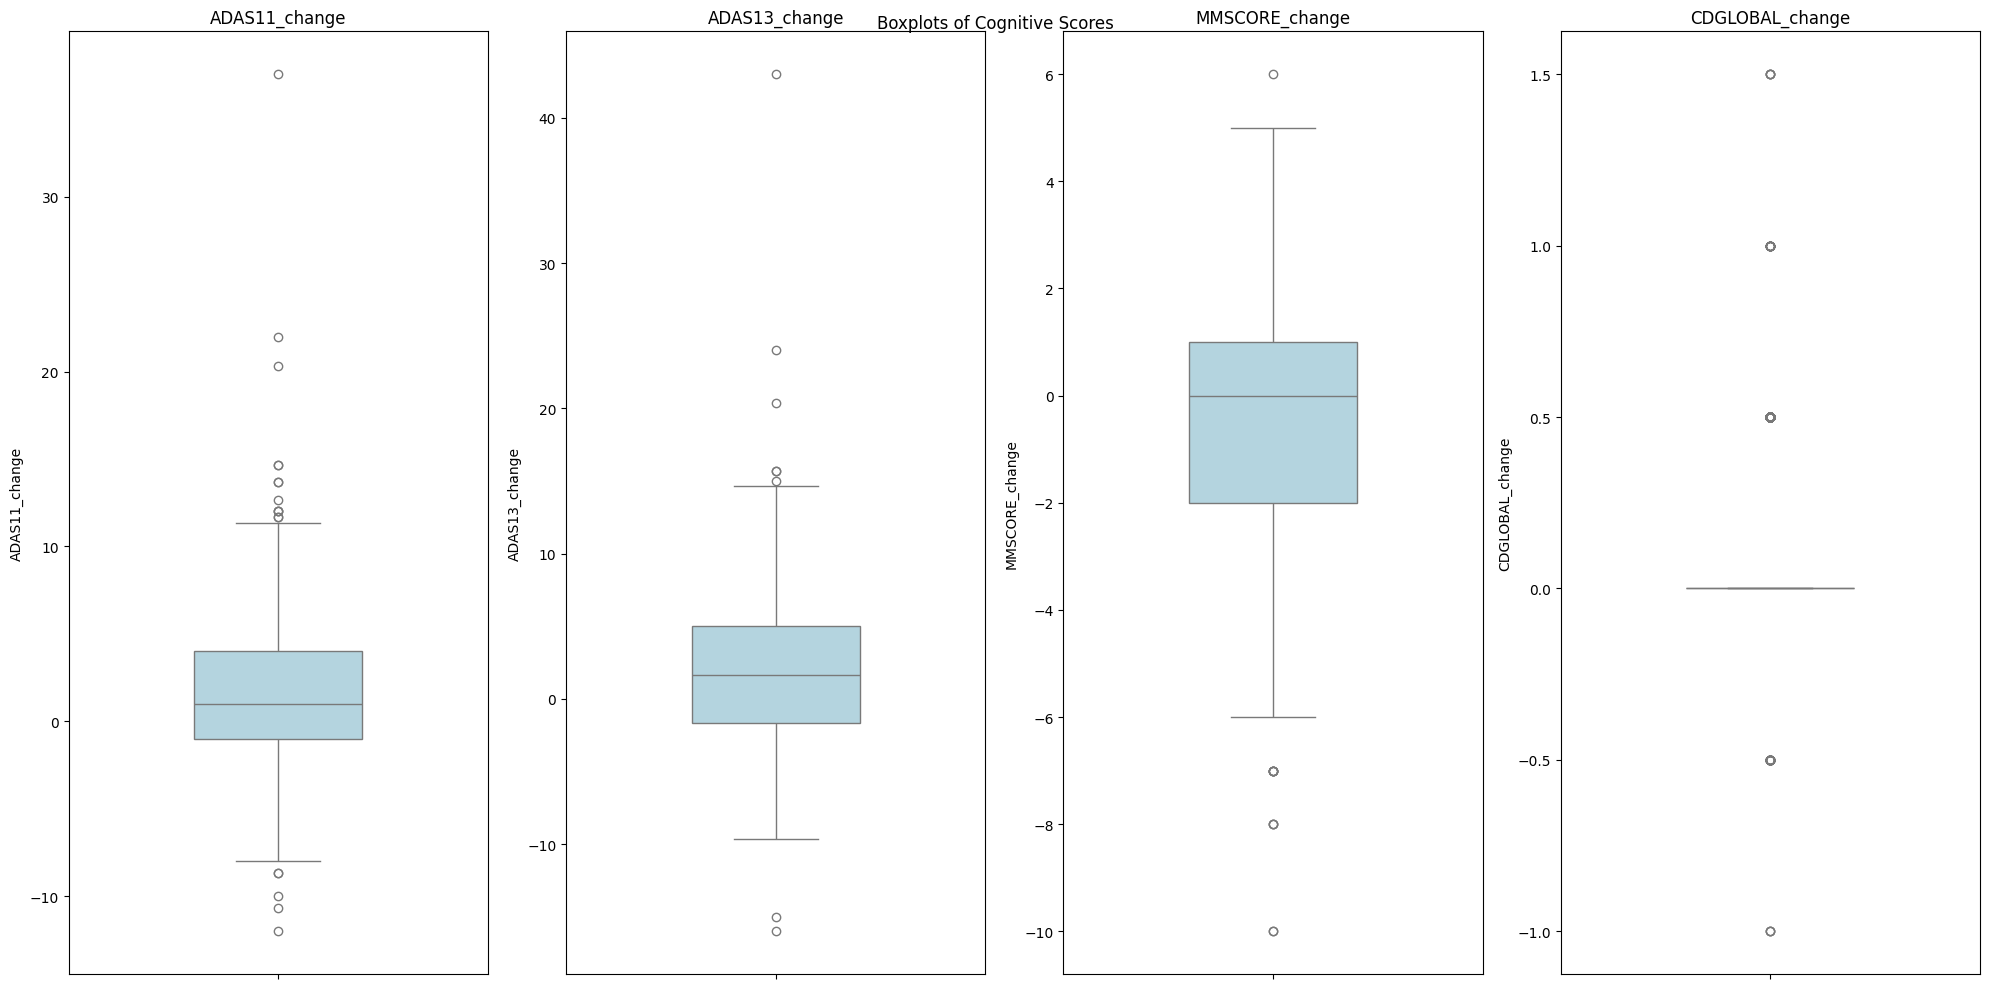

In [56]:
box_df = df_test.copy()
# Invert lại giá trị của các cột
box_df['ADAS11'] = box_df['ADAS11'].apply(lambda x: x*(70-0)+0 if pd.notnull(x) else x)
box_df['ADAS13'] = box_df['ADAS13'].apply(lambda x: x*(85-0)+0 if pd.notnull(x) else x)
box_df['MMSCORE'] = box_df['MMSCORE'].apply(lambda x: x*(30-0)+0 if pd.notnull(x) else x)
box_df['CDGLOBAL'] = box_df['CDGLOBAL'].apply(lambda x: x*(3-0)+0 if pd.notnull(x) else x)
box_df['ADAS11_6_18'] = box_df['ADAS11_6_18'].apply(lambda x: x*(70-0)+0 if pd.notnull(x) else x)
box_df['ADAS13_6_18'] = box_df['ADAS13_6_18'].apply(lambda x: x*(85-0)+0 if pd.notnull(x) else x)
box_df['MMSCORE_6_18'] = box_df['MMSCORE_6_18'].apply(lambda x: x*(30-0)+0 if pd.notnull(x) else x)
box_df['CDGLOBAL_6_18'] = box_df['CDGLOBAL_6_18'].apply(lambda x: x*(3-0)+0 if pd.notnull(x) else x)

box_df['ADAS11_change'] = box_df['ADAS11_6_18'] - box_df['ADAS11']
box_df['ADAS13_change'] = box_df['ADAS13_6_18'] - box_df['ADAS13']
box_df['MMSCORE_change'] = box_df['MMSCORE_6_18'] - box_df['MMSCORE']
box_df['CDGLOBAL_change'] = box_df['CDGLOBAL_6_18'] - box_df['CDGLOBAL']
cols = ['ADAS11_change', 'ADAS13_change', 'MMSCORE_change', 'CDGLOBAL_change']
plt.figure(figsize=(20, 10))
for i, col in enumerate(cols):
    plt.subplot(1, 4, i + 1)
    sns.boxplot(y=box_df[col], color='lightblue', width=0.4)
    plt.title(col)
    plt.tight_layout()
    
plt.suptitle("Boxplots of Cognitive Scores")
plt.show()

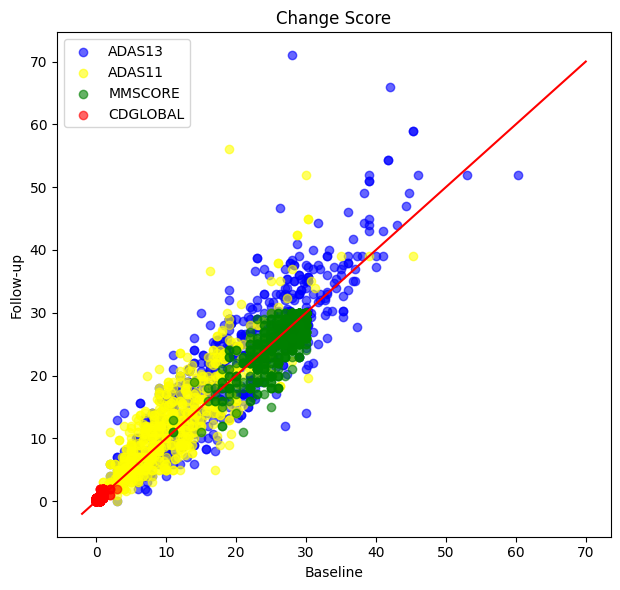

In [57]:
plt.figure(figsize=(12, 6))

# Scatter plot ADAS13
plt.subplot(1, 2, 1)
plt.scatter(box_df['ADAS13'], box_df['ADAS13_6_18'], alpha=0.6, color='blue', label='ADAS13')
plt.scatter(box_df['ADAS11'], box_df['ADAS11_6_18'], alpha=0.6, color='yellow', label='ADAS11')
plt.scatter(box_df['MMSCORE'], box_df['MMSCORE_6_18'], alpha=0.6, color='green', label='MMSCORE')
plt.scatter(box_df['CDGLOBAL'], box_df['CDGLOBAL_6_18'], alpha=0.6, color='red', label='CDGLOBAL')
plt.plot([-2, 70], [-2, 70], 'r-')  # Đường chéo y = x để so sánh
plt.xlabel("Baseline")
plt.ylabel("Follow-up")
plt.title("Change Score")
plt.tight_layout()
plt.legend()
plt.show()
